In [1]:
import inspect
import warnings

warnings.filterwarnings("ignore")

import umap
from pmlb import fetch_data  # , classification_dataset_names
from scipy.stats import entropy, mannwhitneyu
# from seaborn import scatterplot
from sklearn.model_selection import train_test_split

from gower.gower_dist import *

pd.options.display.float_format = '{:.6f}'.format

plt.style.use("dark_background")

optimize = optimize_agglo

### This is a battery of tests to see how well various clustering evaluation metrics perform on a variety of datasets.

The datasets are all from the Penn Machine Learning Benchmark.

Each dataset is capped at 2,000 rows (stratified `train_test_split` with `random_state=42`).

The target variable is either binary or categorical.

### Dataset Selection:

All datasets were run through the `optimize_agglo` function with the default parameters.

If the maximum possible Gini-weighted average of Adjusted Mutual Information and Adjusted Rand Index across the grid of distance threshold values were greater than 0.4, the dataset was included in the analysis.

  0%|          | 0/22 [00:00<?, ?it/s]

[] [1.94661024 1.73205081 3.         1.         2.82842712 1.
 1.         1.         3.31662479 1.         2.         1.73205081
 1.73205081 2.82842712 2.82842712 1.         1.73205081 1.41421356
 2.         2.82842712 2.23606798 2.44948974] []


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

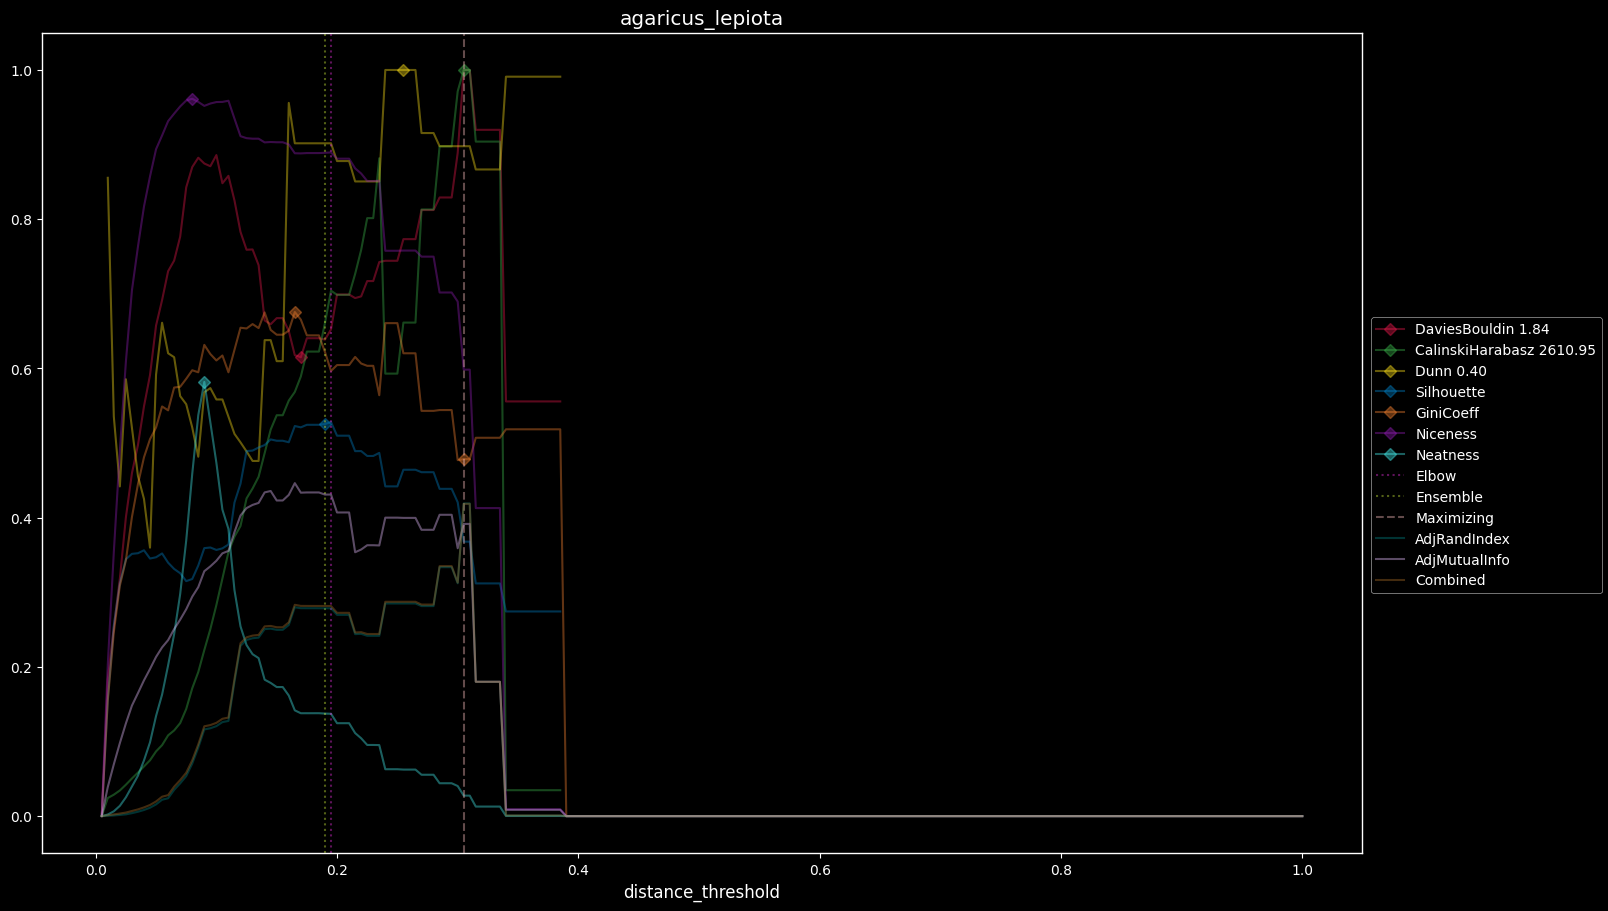

{'Silhouette': 0.3678680053596807, 'Niceness': 0.5983786347219119, 'GiniCoeff': 0.47840618460823064, 'Neatness': 0.027501462096908624, 'sample': {'distance_threshold': 0.305, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {9: 1, 308: 1, 528: 1, 1155: 1}, 'DaviesBouldin': 1.8439702814774224, 'CalinskiHarabasz': 2610.9491757755604, 'Dunn': 0.3570187865097417, 'AdjRandIndex': 0.41909299128398814, 'AdjMutualInfo': 0.3916402087066686, 'Combined': 0.4185472547319396}
0    1038
1     962
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     22.000000
k      2.000000
e      0.692425
g      0.019879
Name: agaricus_lepiota, dtype: float64


  0%|          | 0/70 [00:00<?, ?it/s]

[] [ 7.1294979   4.89415388  2.18224727  5.84044139  7.58229936  3.87298335
  4.26259679  5.26587252  3.93157134  5.53259258  4.47674582  4.76459386
  4.33170681  3.26967653  4.51530817  3.46410162  2.77762414  3.31662479
  5.09901951  4.83426575  6.50670928  3.69808563  5.18017707  6.88533316
  7.23160672  4.05218657  6.50670928  3.60852629  6.01209554  6.58993821
  3.17628325  2.70654579  3.74165739  3.313294    6.29726696  4.55304067
  5.96987058  3.87298335  7.79315919  4.93609334  3.60225024  3.16227766
  5.18735822  5.23992895  3.47003219  4.36837838  3.46410162  3.60555128
  3.60555128  5.39011293 11.1612605   4.67462089  3.46410162  3.87298335
  2.85518566  5.0358974   7.30644102  3.60555128  3.16227766  7.84092396
  5.37291451  4.14115862  3.87298335  4.31979859  3.313294    2.91933844
  5.79610471  4.60093825  5.2922521   3.31662479] []


  0%|          | 0/841 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

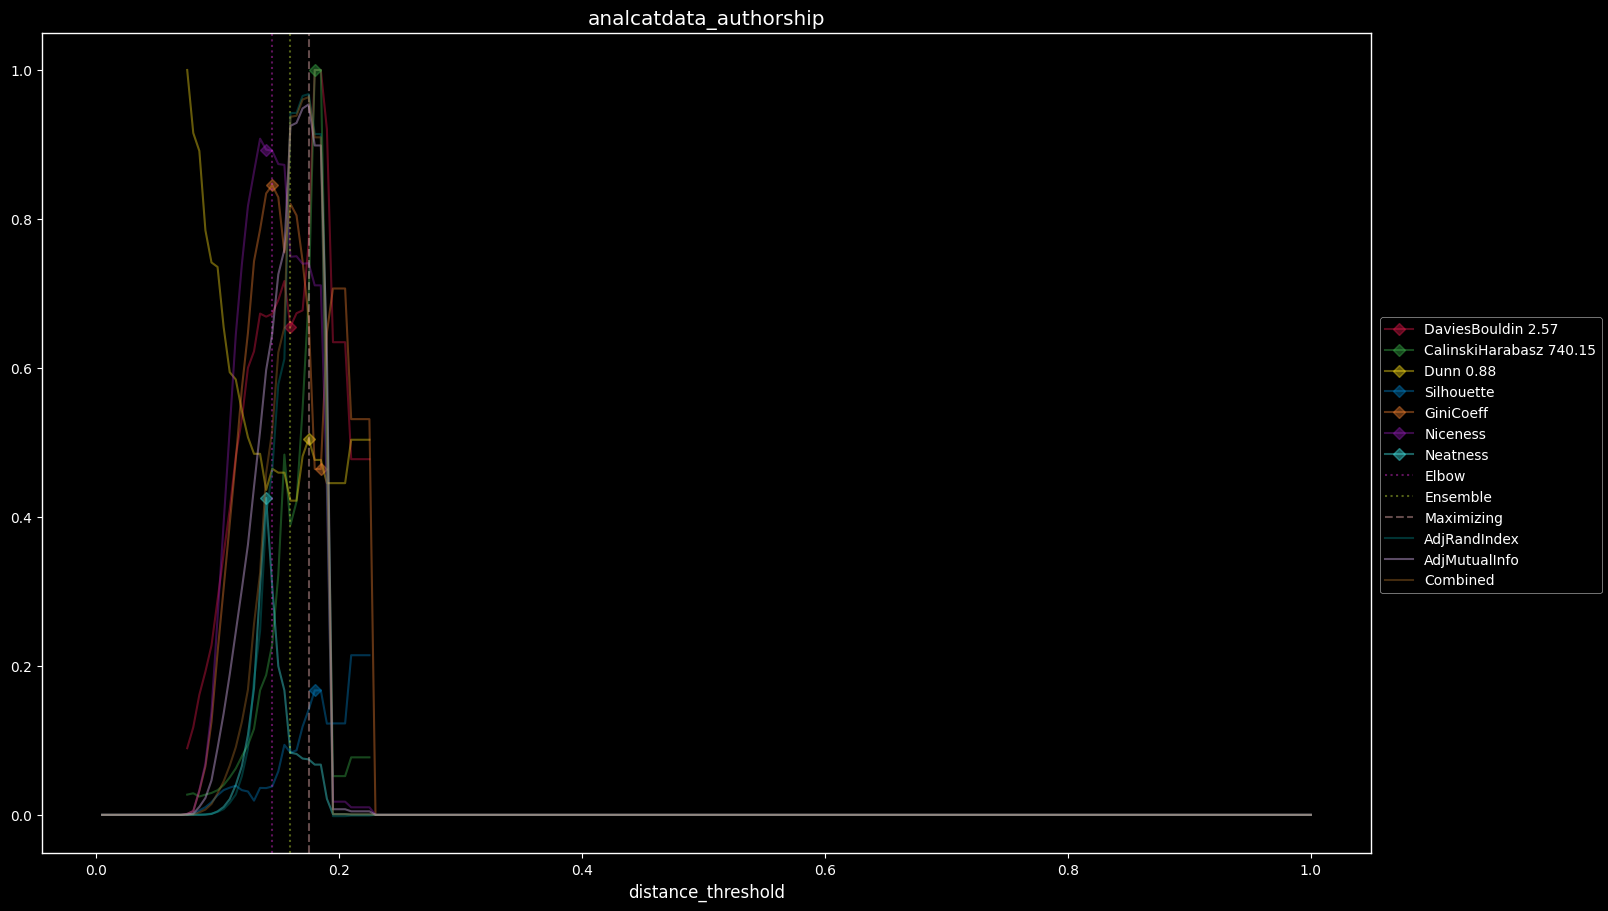

{'Silhouette': 0.141266431462078, 'Niceness': 0.7405702259780766, 'GiniCoeff': 0.665656887755102, 'Neatness': 0.07450086163379693, 'sample': {'distance_threshold': 0.175, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 3: 2, 4: 1, 55: 1, 174: 1, 287: 1, 314: 1}, 'DaviesBouldin': 1.9711972734826262, 'CalinskiHarabasz': 515.380612916275, 'Dunn': 0.44209489504940364, 'AdjRandIndex': 0.9676308175806052, 'AdjMutualInfo': 0.9537722960884977, 'Combined': 0.9636137907833073}
0    317
1    296
3    173
2     55
Name: count, dtype: int64
Dataset Summary
n   841.000000
d    70.000000
k     4.000000
e     1.238942
g     0.289860
Name: analcatdata_authorship, dtype: float64


  0%|          | 0/10 [00:00<?, ?it/s]

[] [2.06824652 3.         3.         3.         3.         3.
 3.16227766 3.         3.         2.77762414] []


  0%|          | 0/699 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

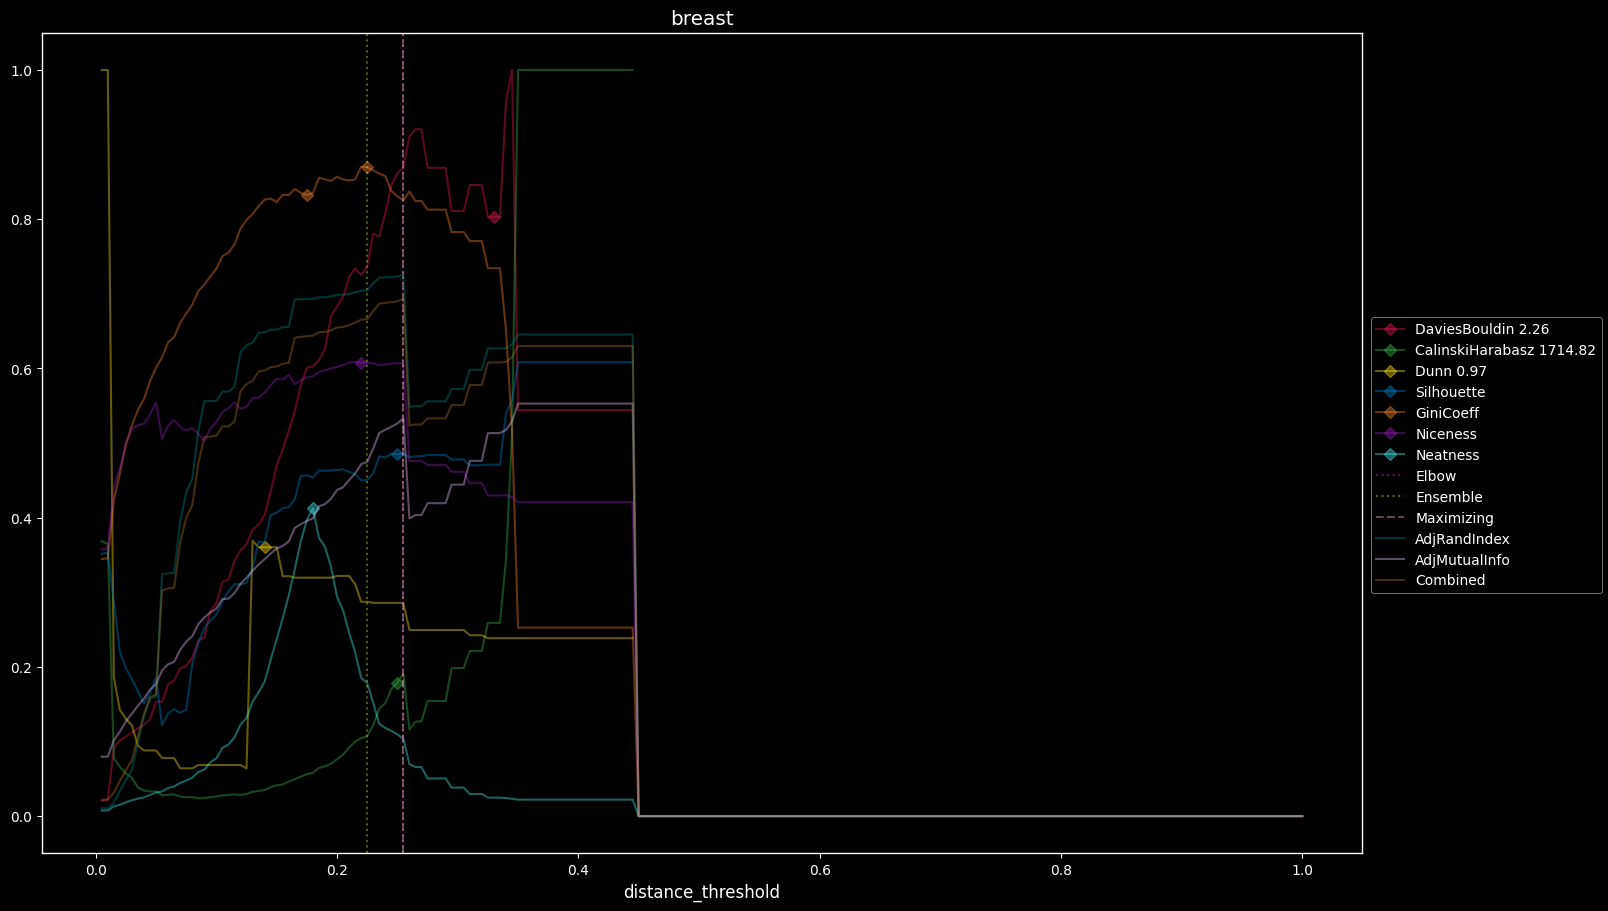

{'Silhouette': 0.4858914858407512, 'Niceness': 0.606714140595063, 'GiniCoeff': 0.8252005943536405, 'Neatness': 0.10360573046867834, 'sample': {'distance_threshold': 0.255, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 2: 1, 3: 1, 4: 3, 7: 1, 10: 1, 14: 1, 19: 1, 27: 1, 28: 1, 63: 1, 69: 1, 444: 1}, 'DaviesBouldin': 1.9655248596307482, 'CalinskiHarabasz': 327.581529010583, 'Dunn': 0.27669751594223757, 'AdjRandIndex': 0.7254323575747712, 'AdjMutualInfo': 0.5330655880233846, 'Combined': 0.6931787672684139}
0    458
1    241
Name: count, dtype: int64
Dataset Summary
n   699.000000
d    10.000000
k     2.000000
e     0.644154
g     0.167667
Name: breast, dtype: float64


  0%|          | 0/30 [00:00<?, ?it/s]

[] [13.40914032 11.21352435 13.5651724  10.68097364 10.3657521  12.39418671
 12.56556304 13.42993584 11.95432652 12.2876313   5.69062144  8.71947797
  5.57000896  3.96479859  7.52162119  9.45898391  4.36465853  8.56887372
  8.46939758  5.88165467 12.97210035 13.56842301 12.85333869  9.49241398
 12.40492622 11.28719517 11.93972342 16.52599866 10.11367001  8.20370787] []


  0%|          | 0/569 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

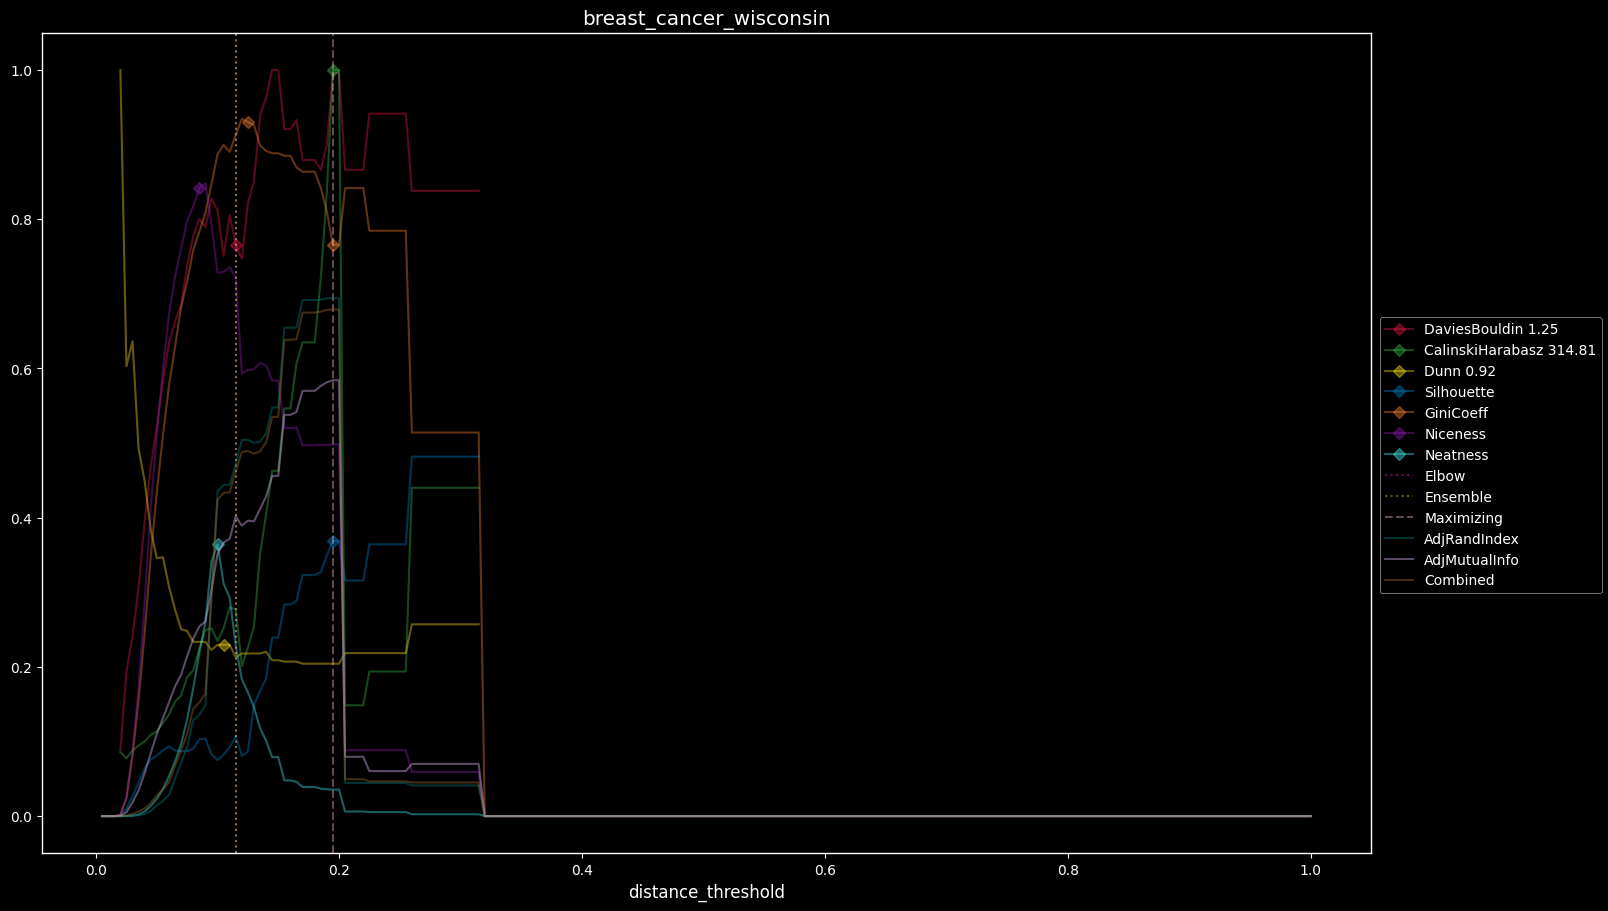

{'Silhouette': 0.3689079924186501, 'Niceness': 0.49835139389421224, 'GiniCoeff': 0.7655364978061427, 'Neatness': 0.03559403383995743, 'sample': {'distance_threshold': 0.195, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 4: 2, 15: 1, 160: 1, 385: 1}, 'DaviesBouldin': 1.2450339208594108, 'CalinskiHarabasz': 314.80553610784114, 'Dunn': 0.18714400725304445, 'AdjRandIndex': 0.6941464166407882, 'AdjMutualInfo': 0.5841595262643937, 'Combined': 0.6788789902941647}
0    357
1    212
Name: count, dtype: int64
Dataset Summary
n   569.000000
d    30.000000
k     2.000000
e     0.660316
g     0.138811
Name: breast_cancer_wisconsin, dtype: float64


  0%|          | 0/23 [00:00<?, ?it/s]

[] [21.83039658  7.85982823 11.73284473 10.54582103 11.39357769  9.07410912
  9.73457399 11.45145476 12.51204025  4.45680223  4.34111142 11.24574561
 13.99705639 12.38032917 12.88197215  8.52750766 12.71436658  7.74322067
 10.41865983 14.8007294   3.41834209 21.83039658  1.        ] []


  0%|          | 0/485 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

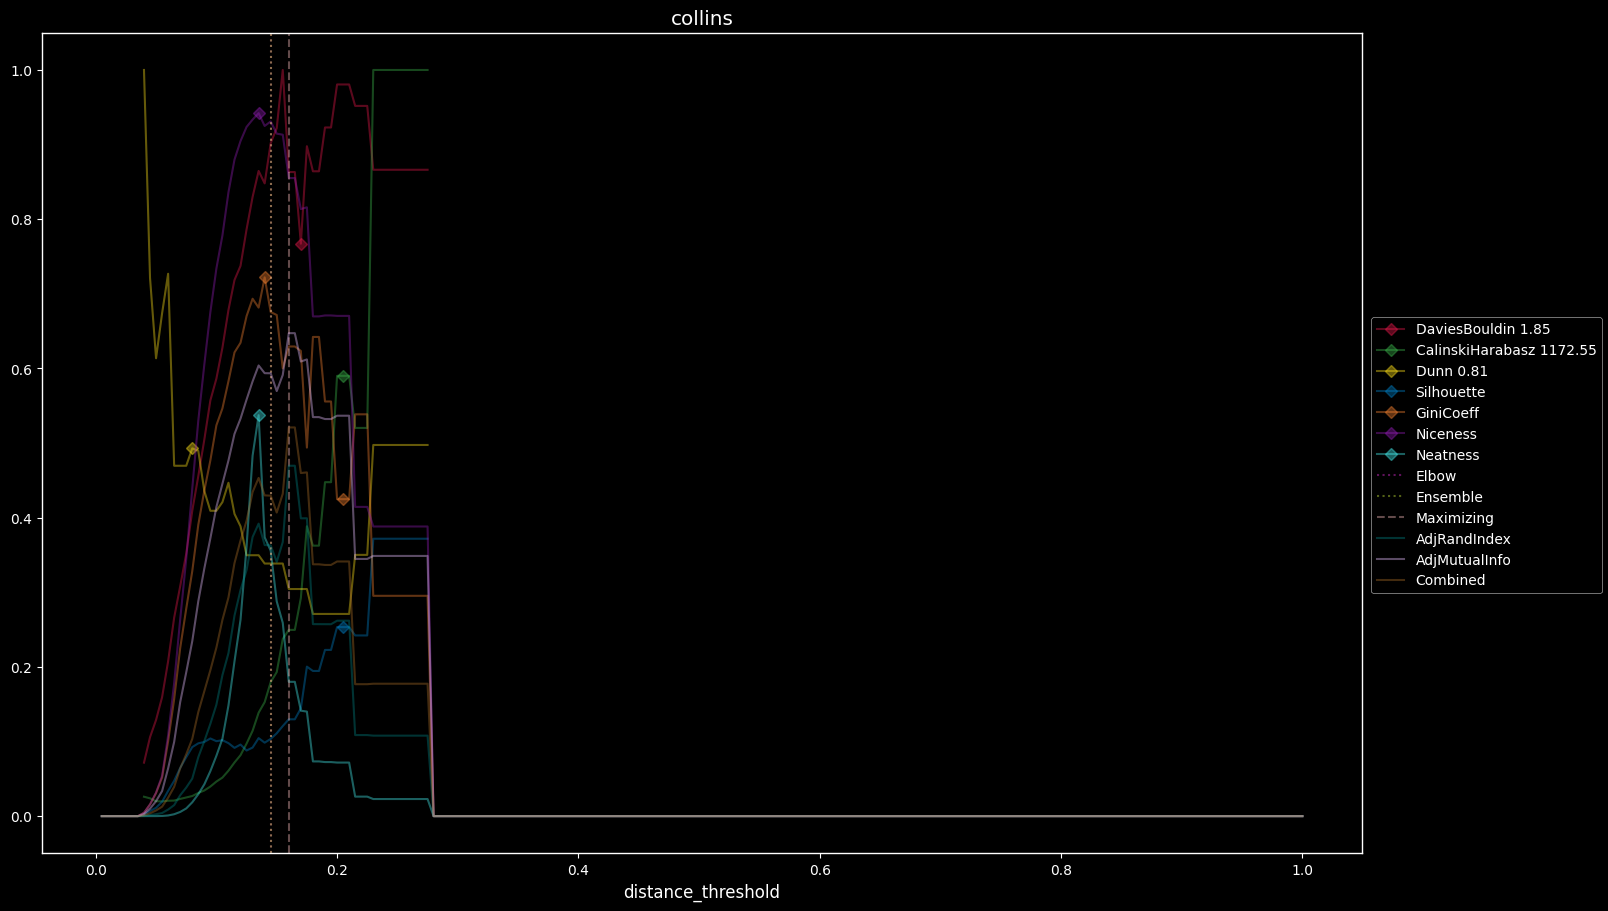

{'Silhouette': 0.1297931609339418, 'Niceness': 0.8551379381712955, 'GiniCoeff': 0.6294353594569577, 'Neatness': 0.18001747153140116, 'sample': {'distance_threshold': 0.16, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 2, 2: 3, 5: 1, 45: 1, 104: 1, 105: 1, 107: 1, 111: 1}, 'DaviesBouldin': 1.6003553698470796, 'CalinskiHarabasz': 292.71326362717093, 'Dunn': 0.24507797237279713, 'AdjRandIndex': 0.46959911743271227, 'AdjMutualInfo': 0.6472800005507138, 'Combined': 0.5209358040478707}
8     80
6     75
5     48
0     44
4     36
7     30
9     29
12    29
13    29
1     27
10    24
2     17
3     17
Name: count, dtype: int64
Dataset Summary
n   485.000000
d    23.000000
k    13.000000
e     2.447482
g     0.288926
Name: collins, dtype: float64


  0%|          | 0/3 [00:00<?, ?it/s]

[] [5.54653713 2.48557861 6.06790679] []


  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

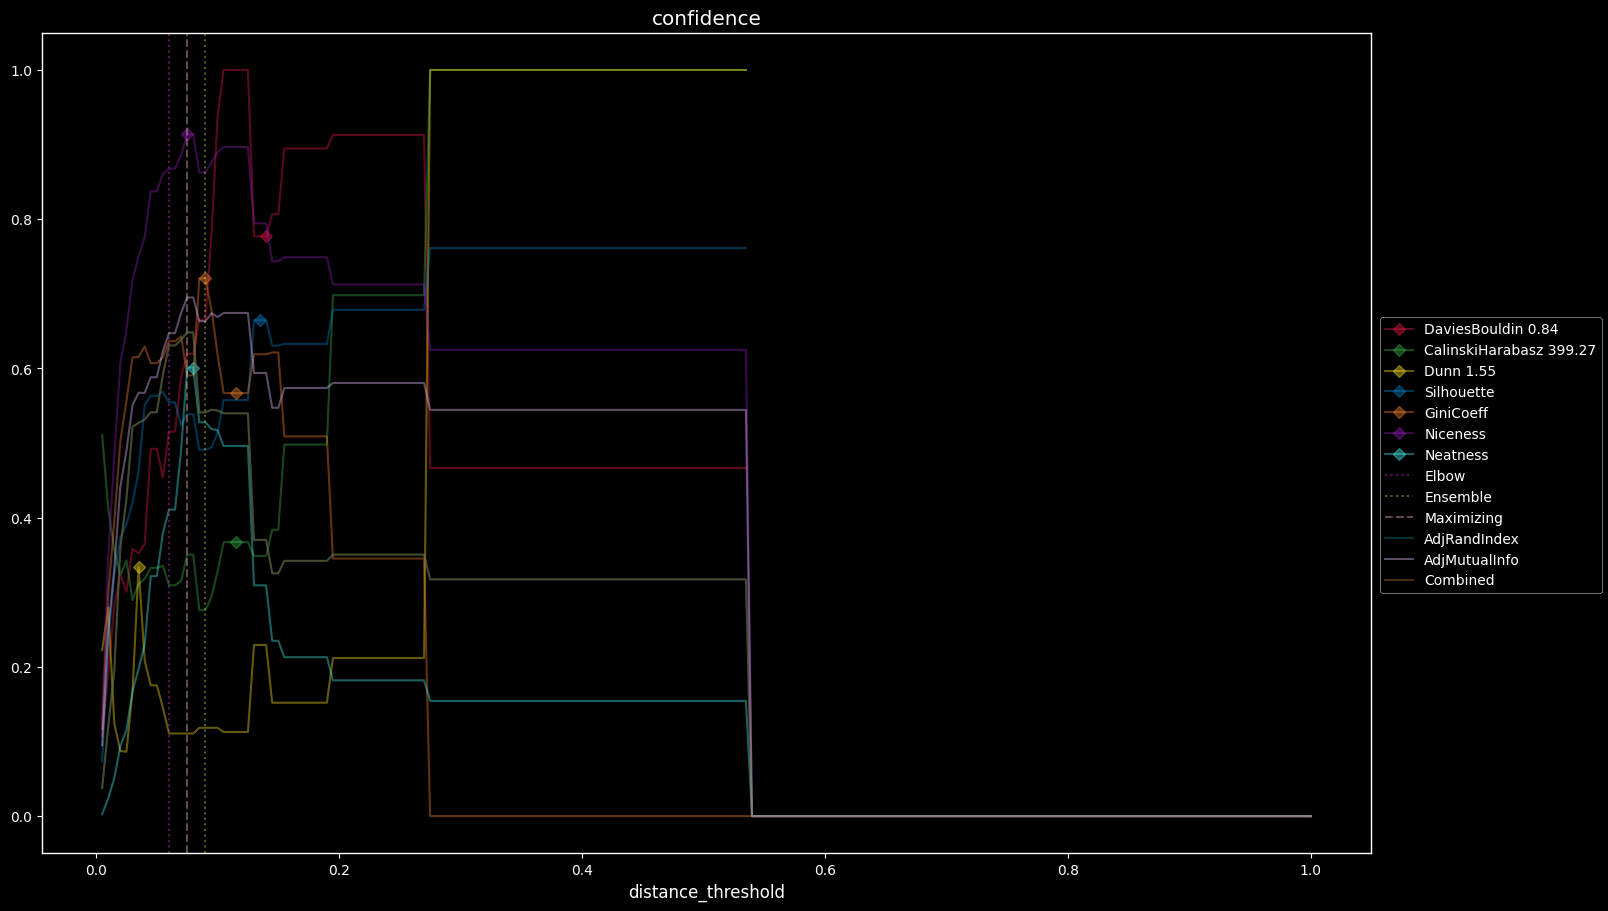

{'Silhouette': 0.5386730561899363, 'Niceness': 0.9137455908289241, 'GiniCoeff': 0.5906593406593407, 'Neatness': 0.6012219702695893, 'sample': {'distance_threshold': 0.075, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 4, 2: 1, 3: 1, 4: 2, 6: 1, 11: 1, 12: 1, 13: 2}, 'DaviesBouldin': 0.5205787181220363, 'CalinskiHarabasz': 139.88495411558281, 'Dunn': 0.17223285578337502, 'AdjRandIndex': 0.6483521570079614, 'AdjMutualInfo': 0.6951089231986718, 'Combined': 0.6483521570079614}
0    12
4    12
2    12
1    12
5    12
3    12
Name: count, dtype: int64
Dataset Summary
n   72.000000
d    3.000000
k    6.000000
e    1.791759
g    0.000000
Name: confidence, dtype: float64


  0%|          | 0/34 [00:00<?, ?it/s]

[] [1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 1.73205081 1.         1.73205081
 1.41421356 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 7.74596669] []


  0%|          | 0/366 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

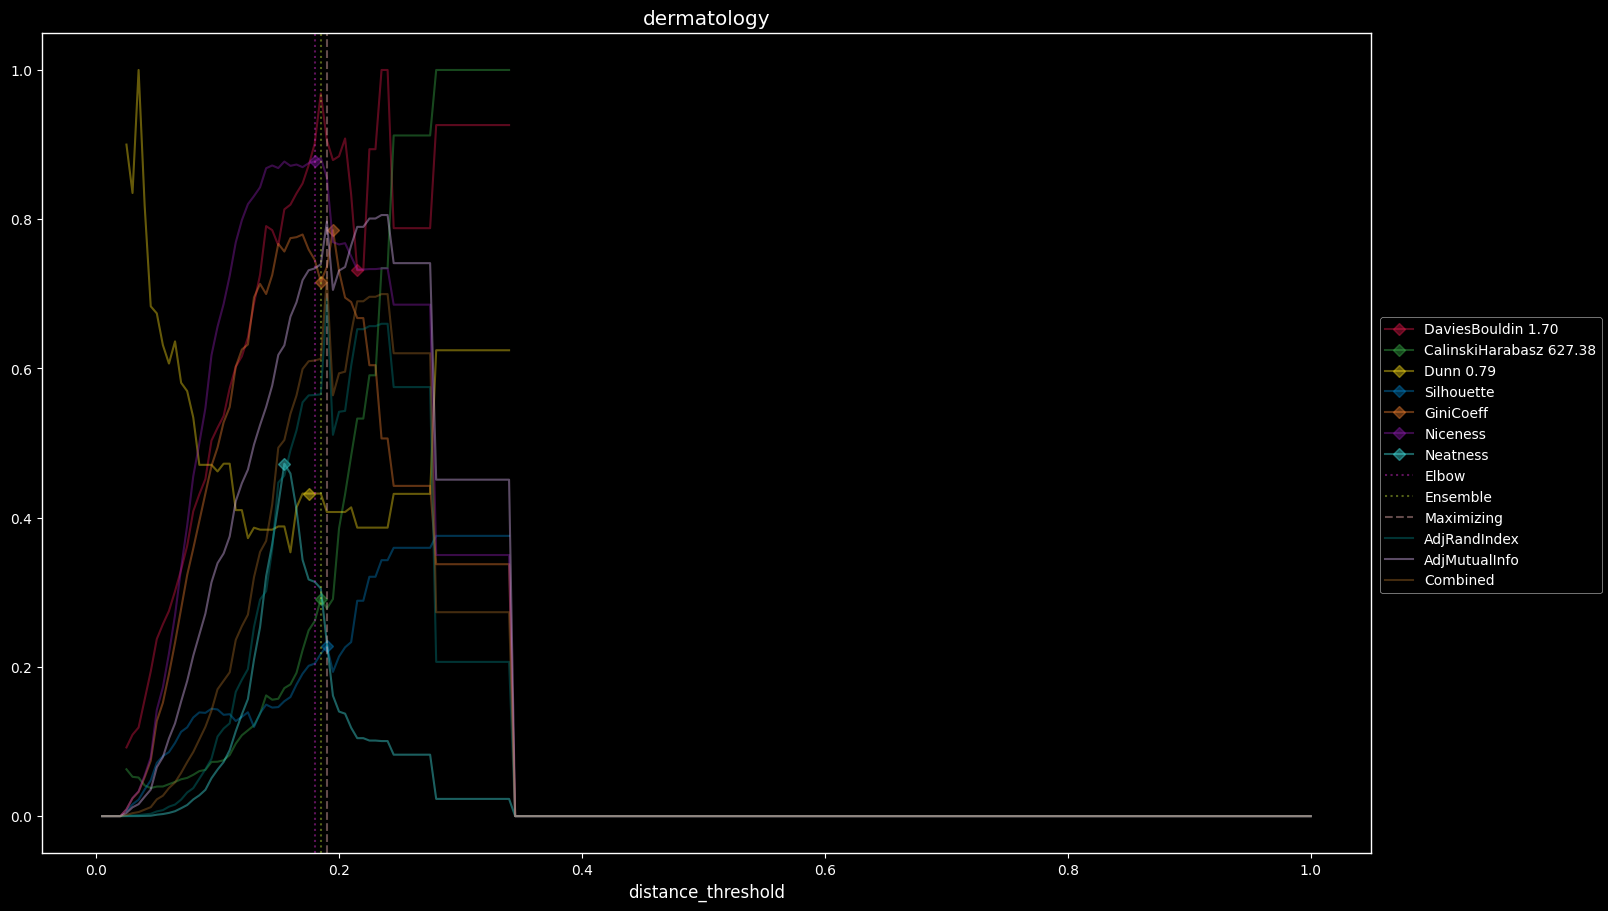

{'Silhouette': 0.22819660440245307, 'Niceness': 0.8556956315243281, 'GiniCoeff': 0.735745543814708, 'Neatness': 0.2319278976289363, 'sample': {'distance_threshold': 0.19, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 2, 2: 2, 3: 1, 4: 1, 6: 1, 7: 1, 9: 2, 10: 1, 51: 1, 70: 1, 80: 1, 111: 1}, 'DaviesBouldin': 1.5366227802077495, 'CalinskiHarabasz': 174.61750623810357, 'Dunn': 0.32157865740385877, 'AdjRandIndex': 0.6931234679028697, 'AdjMutualInfo': 0.7965376419461051, 'Combined': 0.7213308456131363}
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64
Dataset Summary
n   366.000000
d    34.000000
k     6.000000
e     1.686148
g     0.272761
Name: dermatology, dtype: float64


  0%|          | 0/7 [00:00<?, ?it/s]

[] [8.369181   6.95532747 1.         1.         6.65697108 8.4198832
 7.47573902] []


  0%|          | 0/327 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

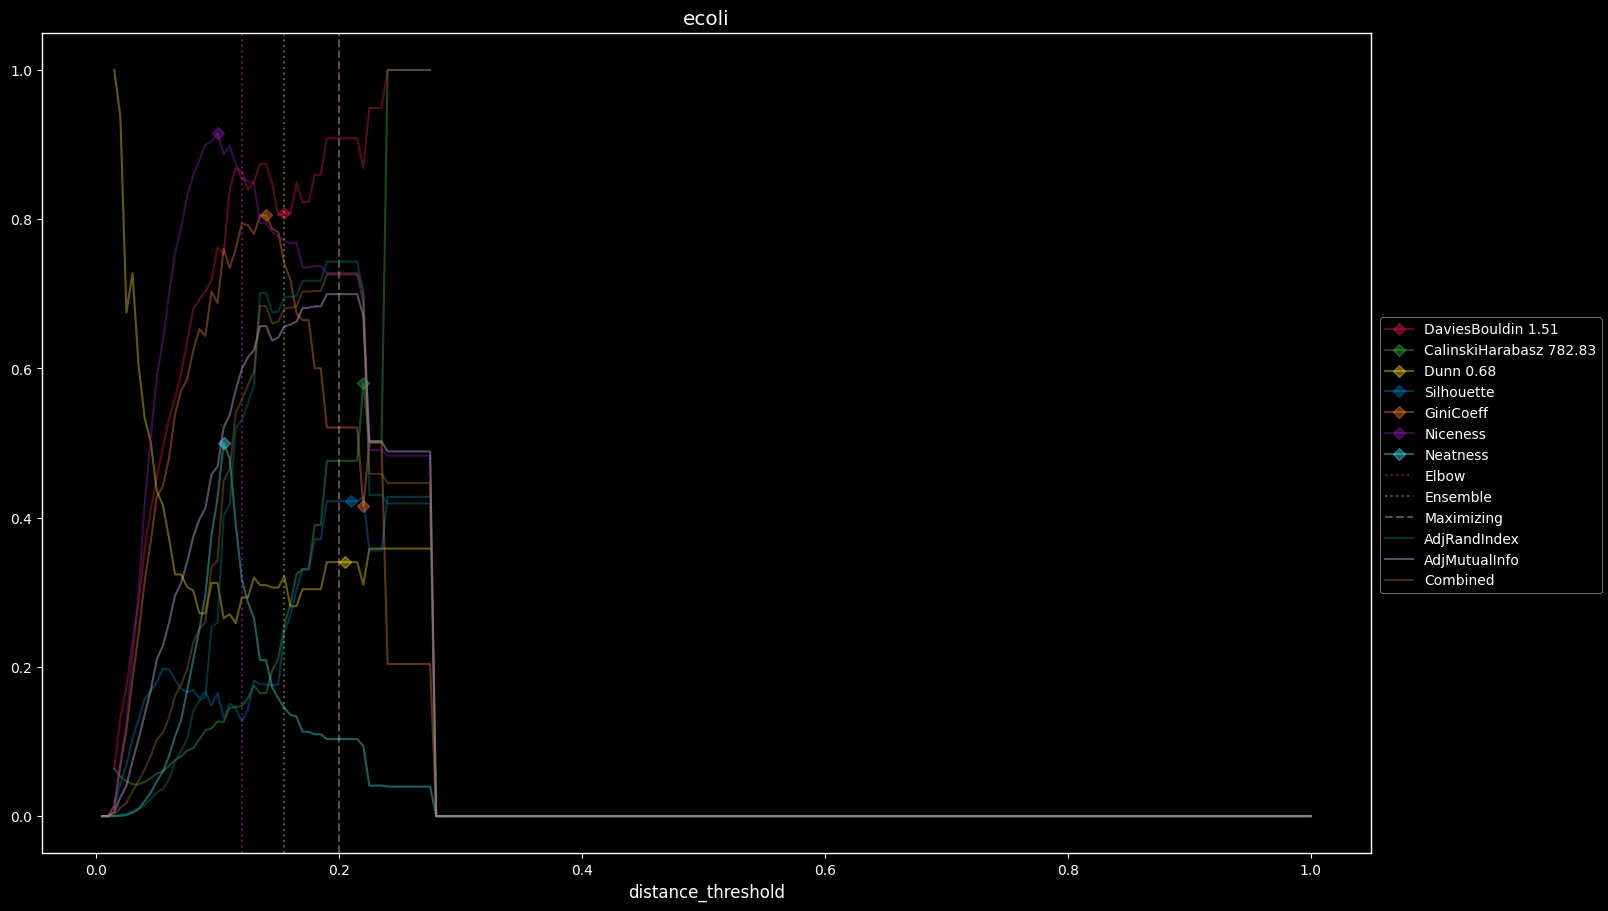

{'Silhouette': 0.4219515007893117, 'Niceness': 0.7279824810860065, 'GiniCoeff': 0.520845231296402, 'Neatness': 0.10327490593494762, 'sample': {'distance_threshold': 0.2, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {2: 1, 8: 1, 69: 1, 104: 1, 144: 1}, 'DaviesBouldin': 1.3719569329244137, 'CalinskiHarabasz': 372.7750429342168, 'Dunn': 0.23169941003424477, 'AdjRandIndex': 0.7431364403991227, 'AdjMutualInfo': 0.6996032526550023, 'Combined': 0.7259518947859097}
0    143
1     77
7     52
4     35
5     20
Name: count, dtype: int64
Dataset Summary
n   327.000000
d     7.000000
k     5.000000
e     1.404712
g     0.394746
Name: ecoli, dtype: float64


  0%|          | 0/16 [00:00<?, ?it/s]

[] [1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356] []


  0%|          | 0/435 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

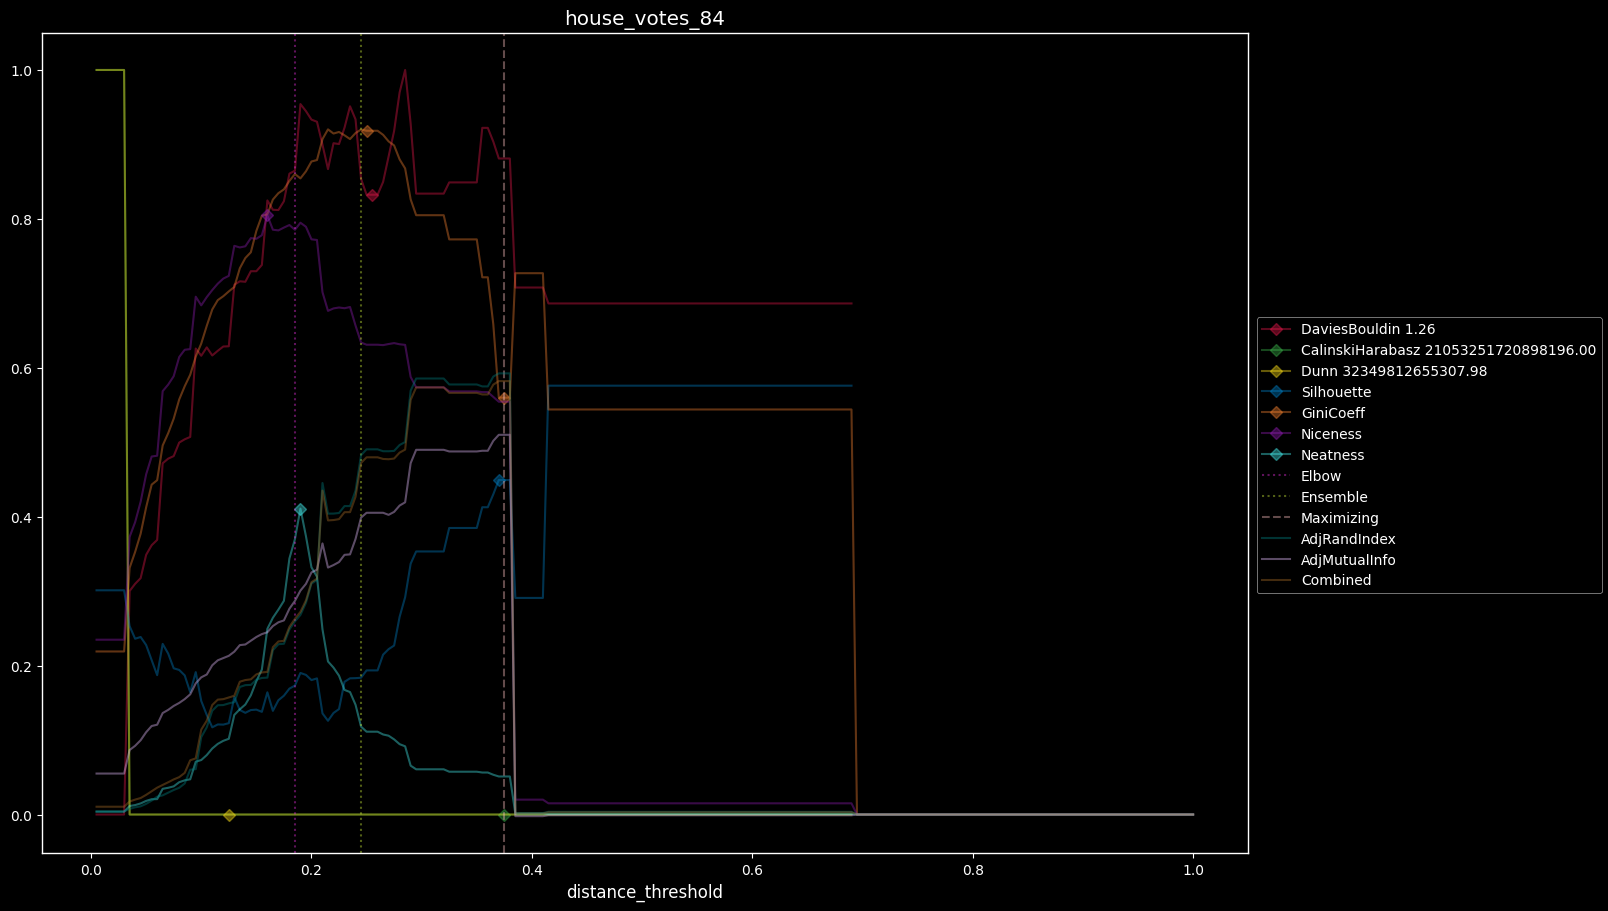

{'Silhouette': 0.4492397508735595, 'Niceness': 0.5544131685336512, 'GiniCoeff': 0.5598731884057971, 'Neatness': 0.05110782080485953, 'sample': {'distance_threshold': 0.375, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 3: 1, 202: 1, 229: 1}, 'DaviesBouldin': 1.106925731808095, 'CalinskiHarabasz': 442.2585019314507, 'Dunn': 0.27163849778099913, 'AdjRandIndex': 0.5924979174356702, 'AdjMutualInfo': 0.5099929442682476, 'Combined': 0.5821399561304121}
0    267
1    168
Name: count, dtype: int64
Dataset Summary
n   435.000000
d    16.000000
k     2.000000
e     0.667021
g     0.125543
Name: house_votes_84, dtype: float64


  0%|          | 0/4 [00:00<?, ?it/s]

[] [5.77334302 4.62402089 5.63255977 4.36449454] []


  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

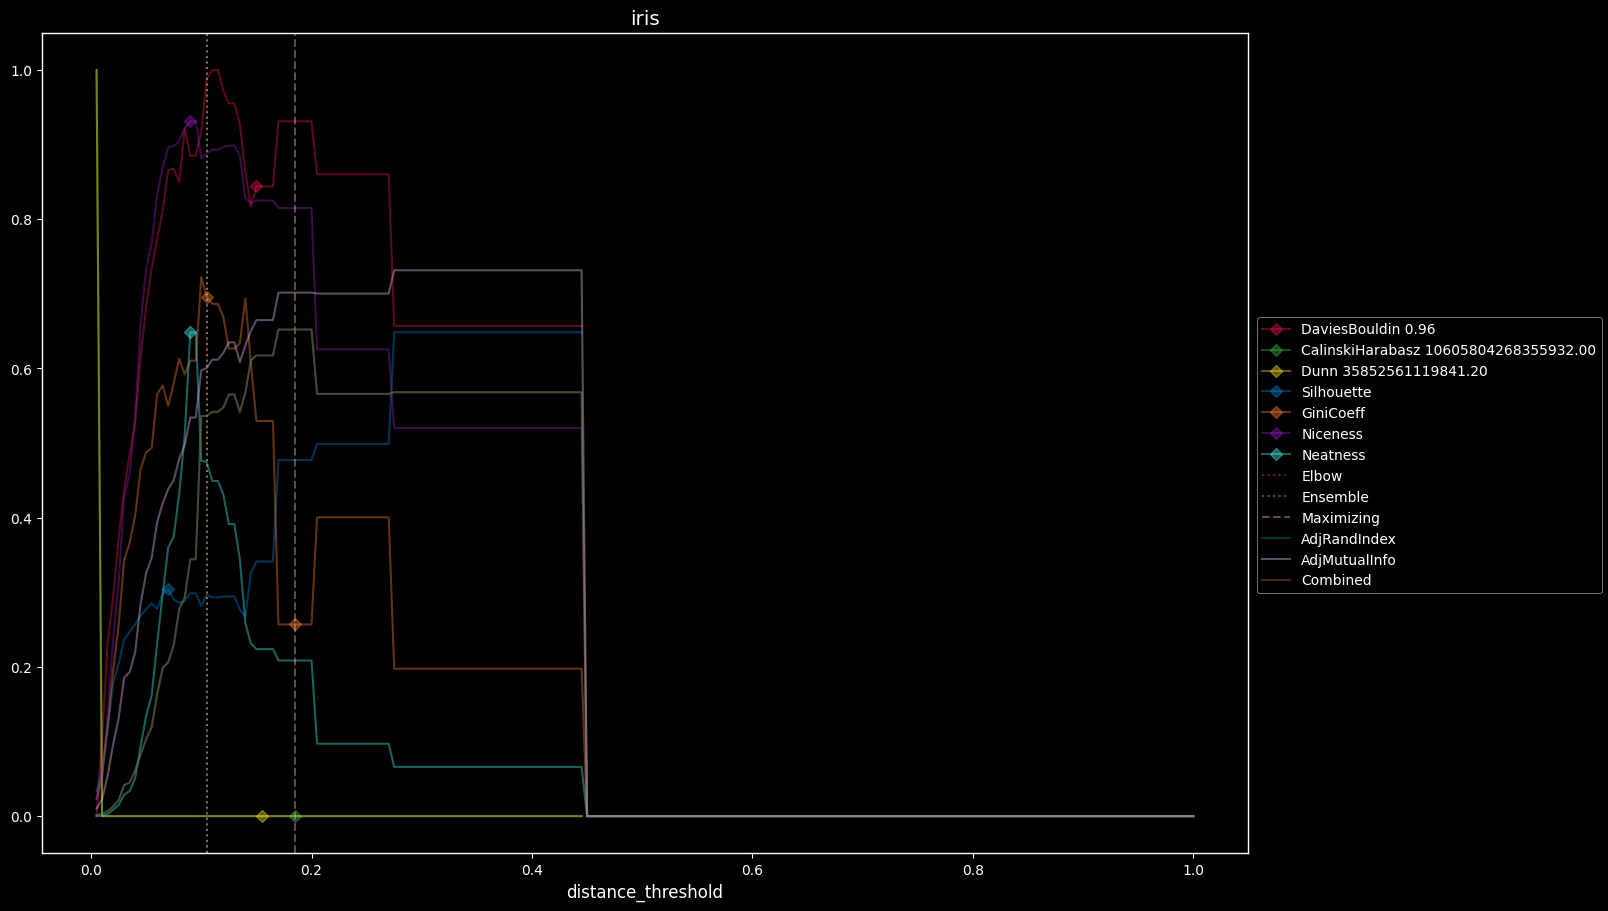

{'Silhouette': 0.47726025597204835, 'Niceness': 0.8149998805271983, 'GiniCoeff': 0.25691699604743085, 'Neatness': 0.20856466953121228, 'sample': {'distance_threshold': 0.185, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {12: 1, 37: 1, 50: 1, 51: 1}, 'DaviesBouldin': 0.897259395549169, 'CalinskiHarabasz': 375.60259226087175, 'Dunn': 0.17073763102706013, 'AdjRandIndex': 0.6521833727068936, 'AdjMutualInfo': 0.7016361903834067, 'Combined': 0.6521833727068936}
2    50
1    50
0    50
Name: count, dtype: int64
Dataset Summary
n   150.000000
d     4.000000
k     3.000000
e     1.098612
g     0.000000
Name: iris, dtype: float64


  0%|          | 0/41 [00:00<?, ?it/s]

[] [ 2.81553296  1.41421356  5.06973843  2.041185    2.07473092  1.27498653
  1.          1.37472964  1.          1.36868802  1.          1.
  1.          1.          1.          1.19055079  1.          1.
  1.          1.          1.          1.          9.11293468  4.71240924
  1.43926489  1.20042121  1.4138273   1.25601386  3.41677844  3.04839709
  4.07422759 10.61359131 10.16327097  7.88320418  5.05534416  5.76112619
  3.87545642  2.14582793  1.15468305  3.11108552  2.7250871 ] []


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

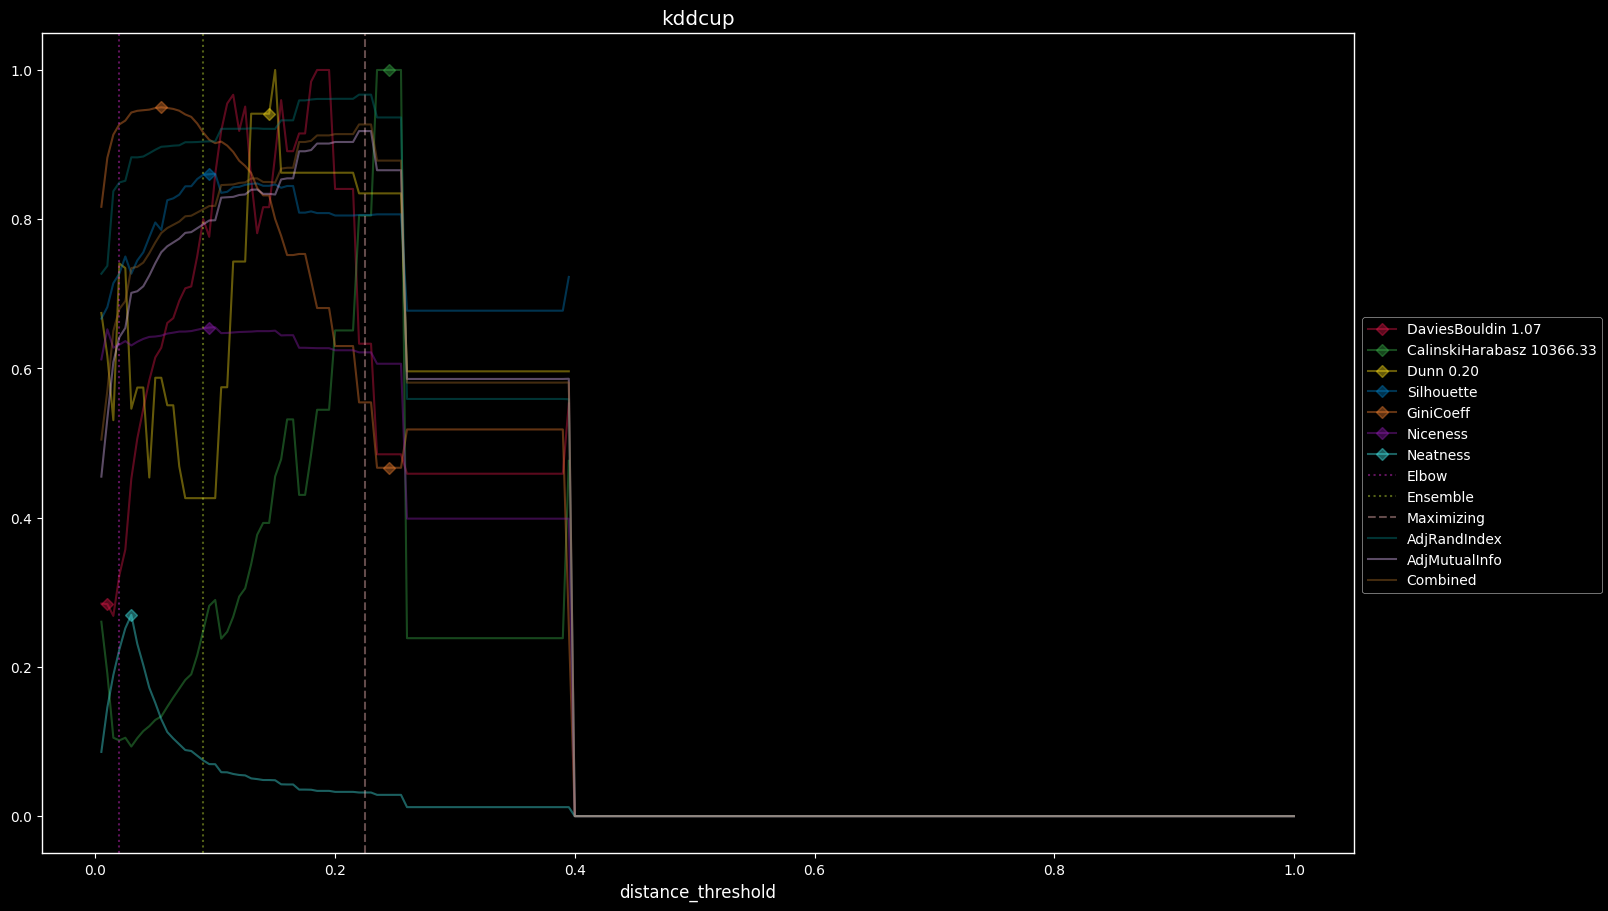

{'Silhouette': 0.8056634751599878, 'Niceness': 0.6215532694963989, 'GiniCoeff': 0.5545222041385724, 'Neatness': 0.03168954452339544, 'sample': {'distance_threshold': 0.225, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 67: 1, 350: 1, 445: 1, 1137: 1}, 'DaviesBouldin': 0.6754219883484328, 'CalinskiHarabasz': 8344.425509468689, 'Dunn': 0.16627420032427906, 'AdjRandIndex': 0.9669292469740022, 'AdjMutualInfo': 0.9180998511609926, 'Combined': 0.9270104340857166}
18    1137
9      434
11     394
0        9
17       7
5        5
15       4
20       4
21       4
10       1
14       1
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     41.000000
k     11.000000
e      1.076621
g      0.817516
Name: kddcup, dtype: float64


  0%|          | 0/216 [00:00<?, ?it/s]

[] [18.3003278  20.52179616 19.04073744 17.69059524 12.20571907 17.10197147
  6.4807407   6.164414    6.244998    4.12310563  4.24264069  4.12310563
 16.70509757 18.09274632 16.18676551 16.05270499 12.42779556 16.100284
  6.40312424  6.27032257  6.32455532  4.89897949  4.12310563  4.47213595
 14.64631342 18.82918318 15.20379834 11.62371847 18.73874906 16.74077845
  6.32455532  6.40312424  6.55743852  4.31979859  4.58257569  4.69041576
 18.41663814 20.1466751  18.90167404 16.30108041 17.30942621 16.07517843
  5.74456265  6.164414    6.55743852  4.65345649  4.58257569  4.69041576
 15.23228061 20.40699537 18.86439086 16.84061411 17.75983376 15.58784849
  6.40312424  6.244998    6.55743852  4.75951505  4.69041576  4.35889894
 14.74850793 16.06761781 18.00158494 14.20728735 19.95598504 17.34091124
  6.32455532  6.08276253  6.4807407   4.35889894  4.35889894  4.89897949
 15.15000139 15.75791803 16.82447782 16.81965904 14.06689981 17.13470087
  6.4807407   6.244998    6.32455532  4.89897949  

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

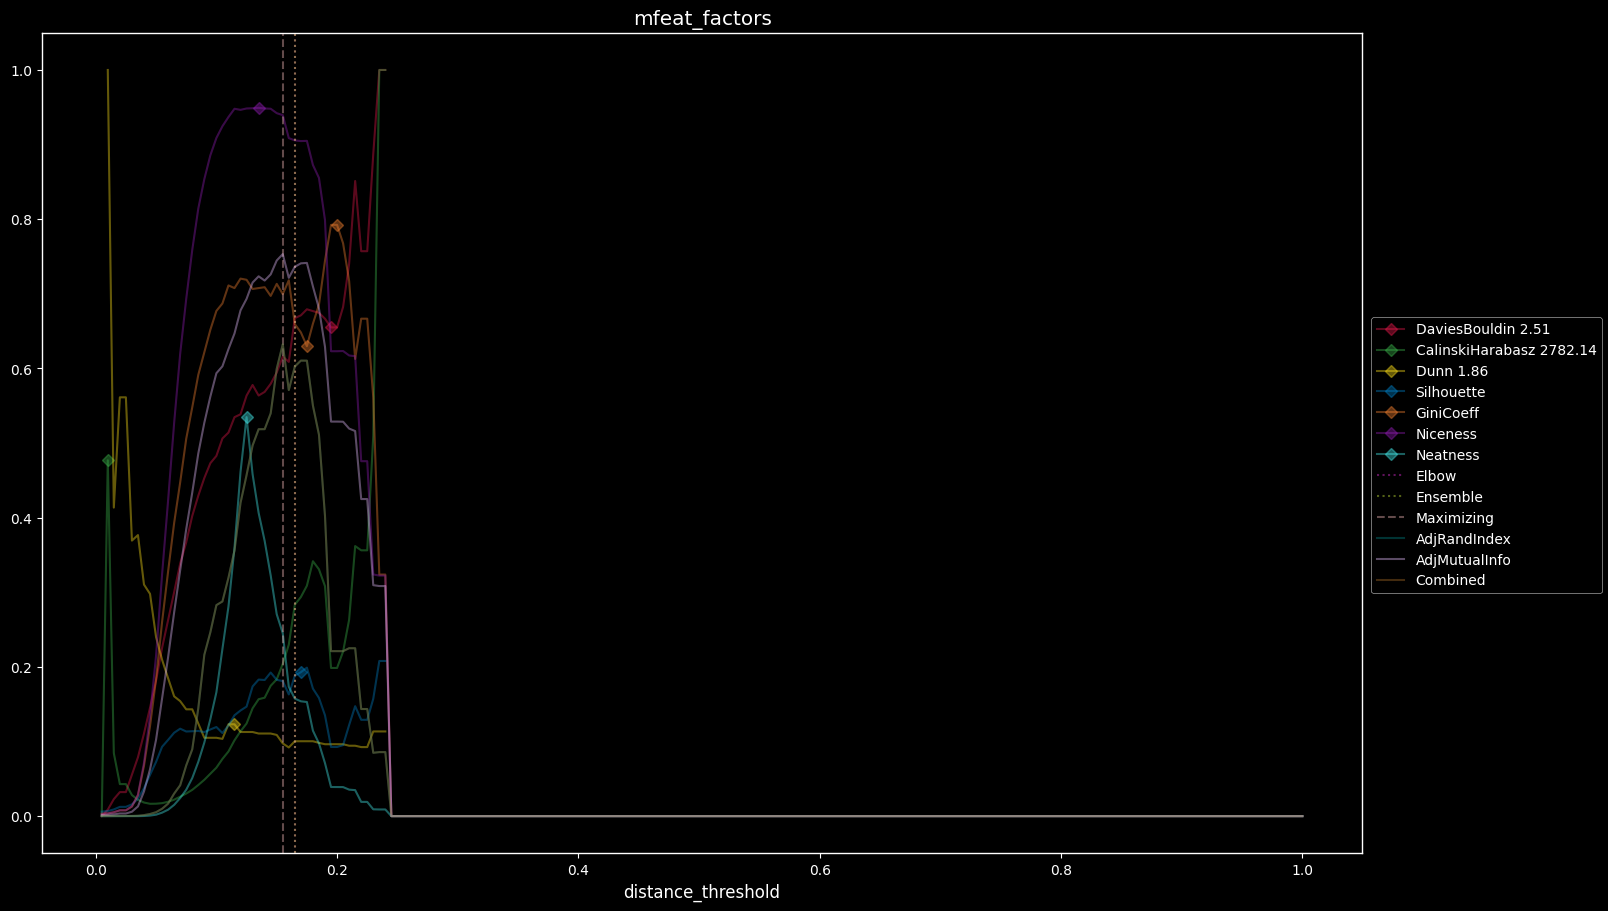

{'Silhouette': 0.1810096590645446, 'Niceness': 0.9394864272784895, 'GiniCoeff': 0.6996246720031887, 'Neatness': 0.2450609662785133, 'sample': {'distance_threshold': 0.155, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 7, 2: 3, 3: 1, 6: 1, 7: 1, 11: 1, 13: 2, 14: 2, 15: 1, 20: 1, 24: 1, 33: 1, 43: 1, 63: 1, 64: 1, 86: 1, 103: 1, 113: 1, 117: 1, 131: 1, 148: 1, 186: 1, 191: 1, 199: 1, 370: 1}, 'DaviesBouldin': 1.5441883437740778, 'CalinskiHarabasz': 567.9258073115014, 'Dunn': 0.18146352675680869, 'AdjRandIndex': 0.6324298046135716, 'AdjMutualInfo': 0.7532361033934265, 'Combined': 0.6324298046135716}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d    216.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_factors, dtype: float64


  0%|          | 0/76 [00:00<?, ?it/s]

[] [32.05026611 32.43976709 28.10116673 24.3976811  26.23911617 27.66433233
 30.16069961 29.96244744 26.19542428 16.54904184 28.94175597 25.23521915
 27.27624167 24.03814804 23.61618164 21.98227454 20.42267497 28.48194473
 21.69570141 22.4877019  24.25394415 22.7058799  25.48590318 17.54986122
 26.72734125 22.46838742 19.83675685 21.5982594  24.78349413 25.62566061
 21.68498578 21.54370174 22.57584831 19.4081423  21.5368533  24.60234669
 23.40576977 20.13293933 21.89464653 21.92334304 23.93740538 25.62752104
 24.81701563 21.7664294  26.35084754 23.88105035 25.64576347 24.49448509
 21.79960638 24.1561201  25.26684181 26.68939458 27.12648004 26.72049157
 27.8039631  27.22747889 27.72357798 25.88470125 25.57805735 27.5107847
 28.97979239 24.2052871  27.69252651 20.65124185 17.5304077  27.85962585
 23.87732774 21.37087081 24.86764471 23.79403186 27.78945465 29.19592651
 23.96591192 28.98937638 23.07076637 29.26174844] []


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

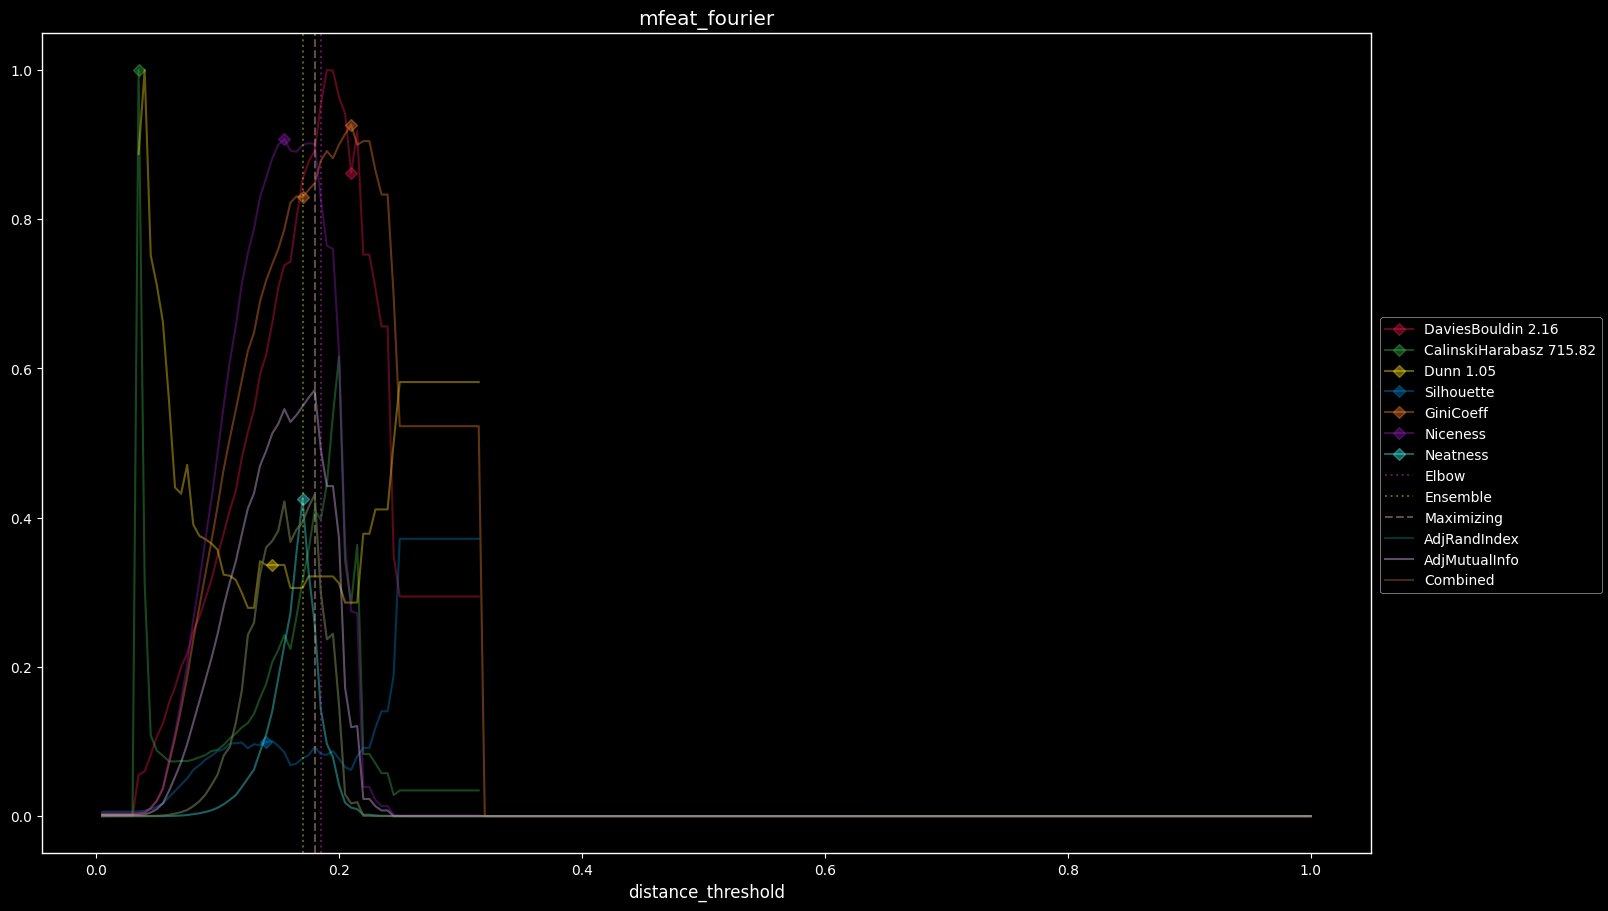

{'Silhouette': 0.09284618785681238, 'Niceness': 0.9006452381153228, 'GiniCoeff': 0.84833044193658, 'Neatness': 0.2574777339732761, 'sample': {'distance_threshold': 0.18, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 16, 2: 7, 3: 11, 4: 5, 5: 2, 6: 1, 7: 1, 8: 1, 9: 1, 11: 1, 14: 1, 16: 2, 19: 1, 22: 1, 25: 1, 27: 1, 32: 1, 33: 1, 40: 1, 48: 1, 63: 1, 107: 1, 130: 1, 136: 1, 150: 1, 184: 1, 378: 1, 426: 1}, 'DaviesBouldin': 1.9237419286639017, 'CalinskiHarabasz': 293.2263828868991, 'Dunn': 0.33640916821717337, 'AdjRandIndex': 0.43072956983476707, 'AdjMutualInfo': 0.5711424253386754, 'Combined': 0.43072956983476707}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     76.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_fourier, dtype: float64


  0%|          | 0/64 [00:00<?, ?it/s]

[] [33.80702167 28.11023177 29.01360389 26.09820657 25.87398494 22.70771037
 26.03928783 27.51792584 23.48768075 27.97311212 23.12435846 22.35941113
 23.76010833 21.21945718 24.98410355 25.87044958 23.37125824 23.27108012
 18.42958701 20.06875945 27.18865682 19.90907465 24.14643265 23.85256944
 21.83631895 25.63232827 22.32789666 23.41625107 22.89695887 22.38651171
 21.52314607 21.93111841 23.08527807 24.00333954 21.75707102 24.63512461
 24.08293326 25.35055191 22.18986063 25.76633518 23.29783628 21.58596833
 26.77711549 25.12775049 17.54919    24.78628537 21.16584463 25.28243983
 24.02248381 18.84066982 19.08024898 24.59373584 21.30245056 24.15614464
 19.19620225 23.27172511 22.53388628 21.24823128 25.96509183 24.19398698
 24.39975536 23.57649107 23.13111878 24.47622634] []


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

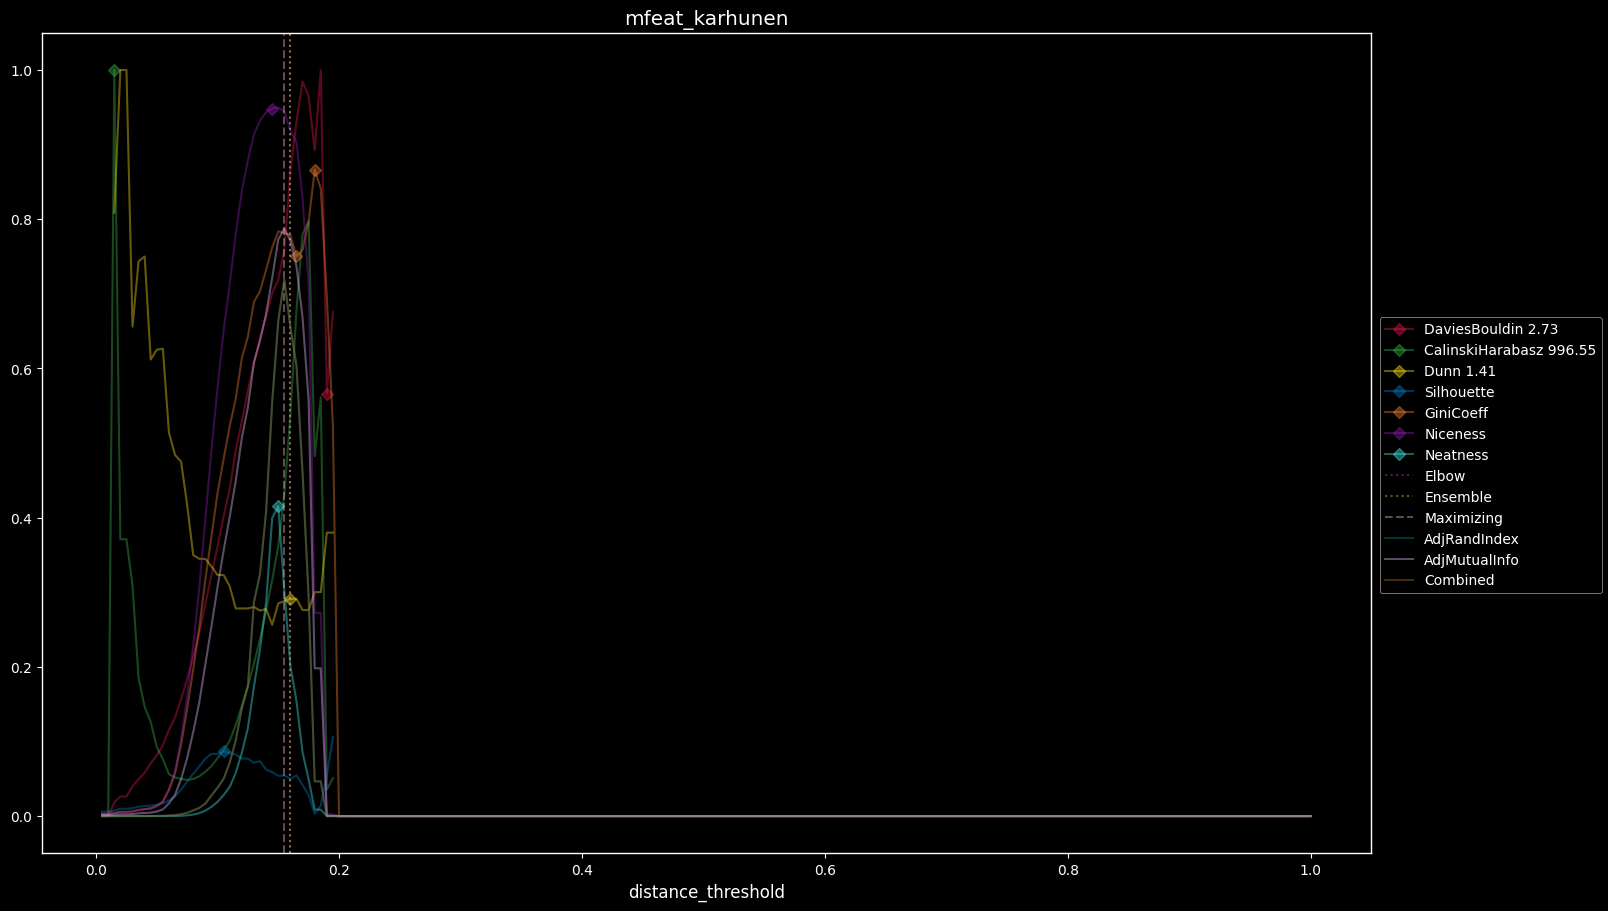

{'Silhouette': 0.05440363752306872, 'Niceness': 0.9444770149566442, 'GiniCoeff': 0.7814129604410934, 'Neatness': 0.3016178788275392, 'sample': {'distance_threshold': 0.155, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 14, 2: 9, 3: 3, 4: 3, 6: 1, 7: 1, 8: 1, 9: 1, 10: 2, 12: 1, 13: 1, 18: 1, 21: 1, 24: 2, 26: 1, 28: 1, 38: 1, 45: 2, 83: 1, 109: 1, 130: 1, 153: 1, 160: 1, 167: 1, 179: 1, 182: 1, 199: 1, 241: 1}, 'DaviesBouldin': 2.071545008524435, 'CalinskiHarabasz': 430.42138056236405, 'Dunn': 0.40678678379742766, 'AdjRandIndex': 0.7190970979343196, 'AdjMutualInfo': 0.7875633772078562, 'Combined': 0.7190970979343196}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     64.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_karhunen, dtype: float64


  0%|          | 0/6 [00:00<?, ?it/s]

[] [ 1.41421356  2.44948974  2.23606798 22.0486861  24.49777558 27.50376671] []


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

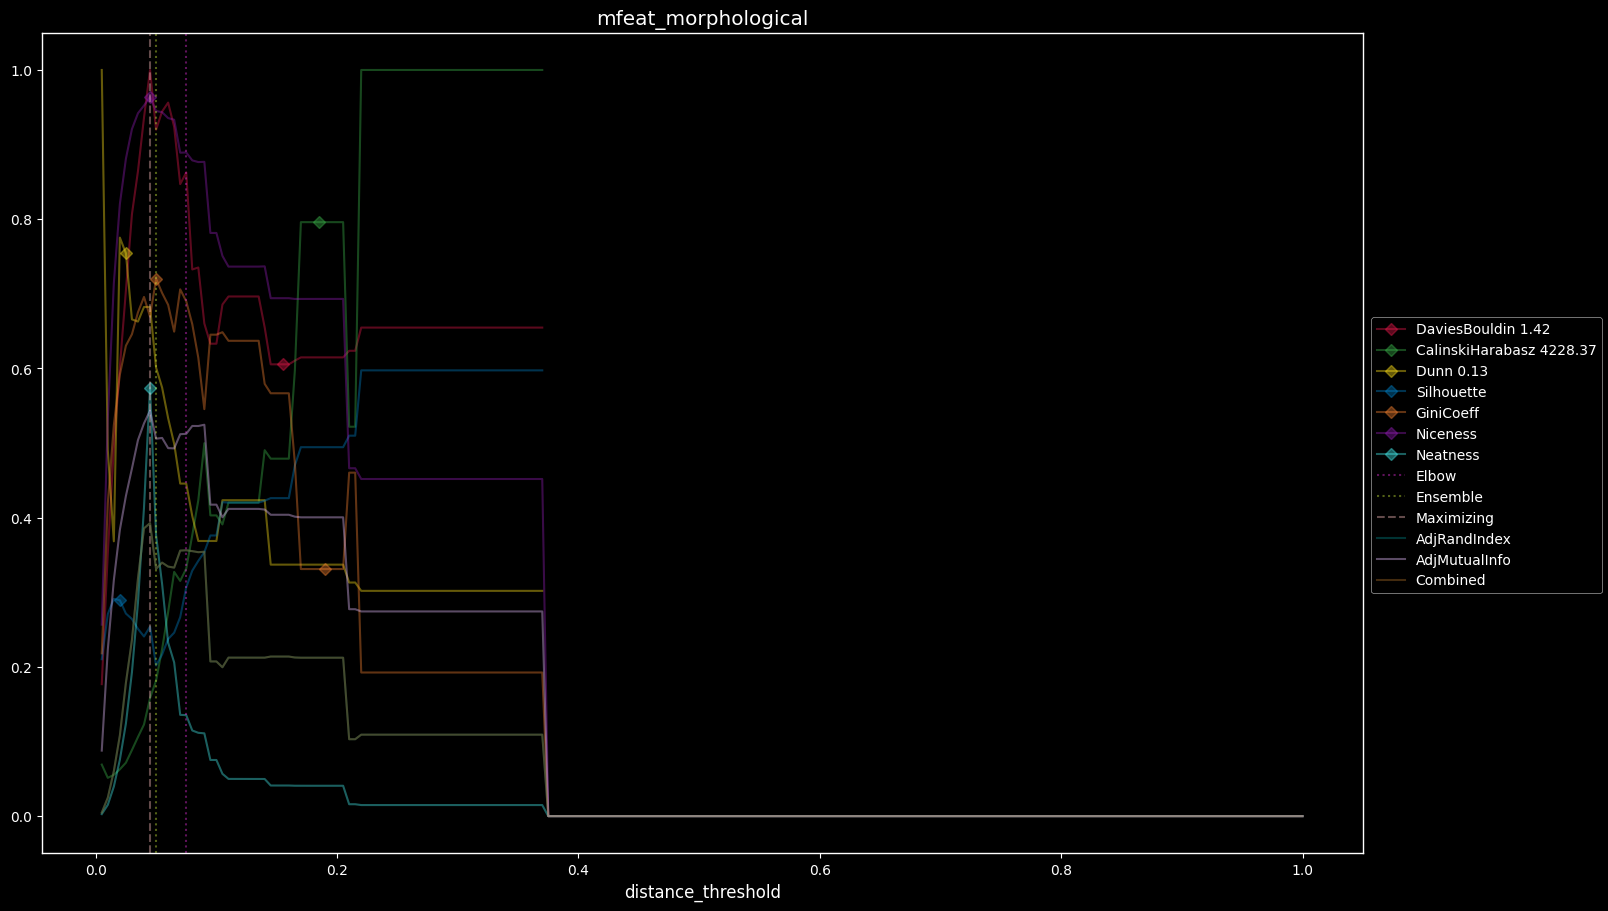

{'Silhouette': 0.2539570140295604, 'Niceness': 0.9639102265236178, 'GiniCoeff': 0.6693394017956958, 'Neatness': 0.5743817843987955, 'sample': {'distance_threshold': 0.045, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 10, 2: 4, 3: 7, 4: 3, 5: 3, 6: 2, 7: 2, 8: 2, 9: 4, 10: 2, 12: 2, 13: 1, 14: 1, 20: 1, 21: 1, 24: 2, 28: 2, 30: 1, 31: 1, 32: 1, 33: 1, 35: 1, 38: 1, 42: 1, 43: 2, 46: 2, 50: 1, 51: 1, 59: 1, 60: 1, 61: 1, 67: 1, 70: 1, 72: 1, 75: 1, 81: 1, 170: 1, 195: 1, 210: 1}, 'DaviesBouldin': 1.422948042531105, 'CalinskiHarabasz': 668.7898317536003, 'Dunn': 0.09127348533245601, 'AdjRandIndex': 0.3927197869882485, 'AdjMutualInfo': 0.5434276020406054, 'Combined': 0.3927197869882485}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d      6.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_morphological, dtype: float64


  0%|          | 0/240 [00:00<?, ?it/s]

[] [2.18224727 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.18224727 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974
 2.44948974 2.44948974 2.44948974 2.44948974 2.44948974 2.4

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

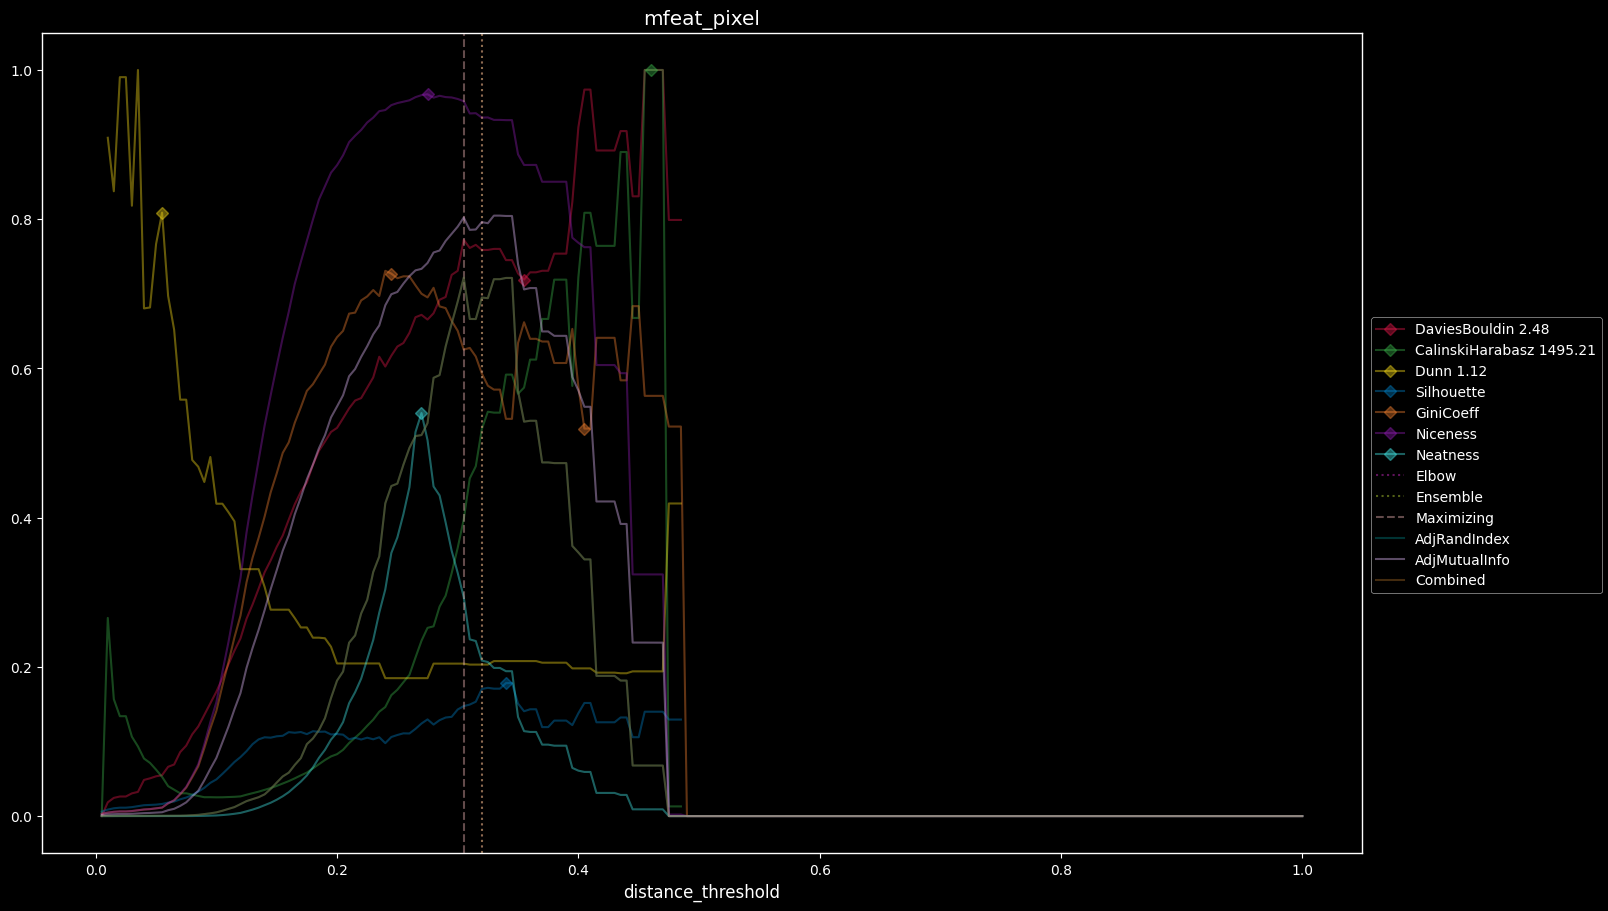

{'Silhouette': 0.14742684156626013, 'Niceness': 0.9581620309328797, 'GiniCoeff': 0.6252376328350452, 'Neatness': 0.293449521581132, 'sample': {'distance_threshold': 0.305, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 5, 3: 1, 7: 1, 9: 1, 10: 3, 11: 1, 12: 2, 14: 1, 17: 1, 19: 2, 20: 1, 25: 1, 35: 1, 55: 1, 80: 1, 83: 1, 91: 1, 97: 1, 116: 1, 155: 1, 161: 1, 166: 1, 171: 1, 191: 2, 205: 1}, 'DaviesBouldin': 1.9136236277989858, 'CalinskiHarabasz': 594.4562239746728, 'Dunn': 0.2298377699682603, 'AdjRandIndex': 0.7216970697978945, 'AdjMutualInfo': 0.8021877628329735, 'Combined': 0.7216970697978945}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d    240.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_pixel, dtype: float64


  0%|          | 0/5 [00:00<?, ?it/s]

[] [6.64603447 8.64707932 5.00532974 3.57857052 4.6892102 ] []


  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

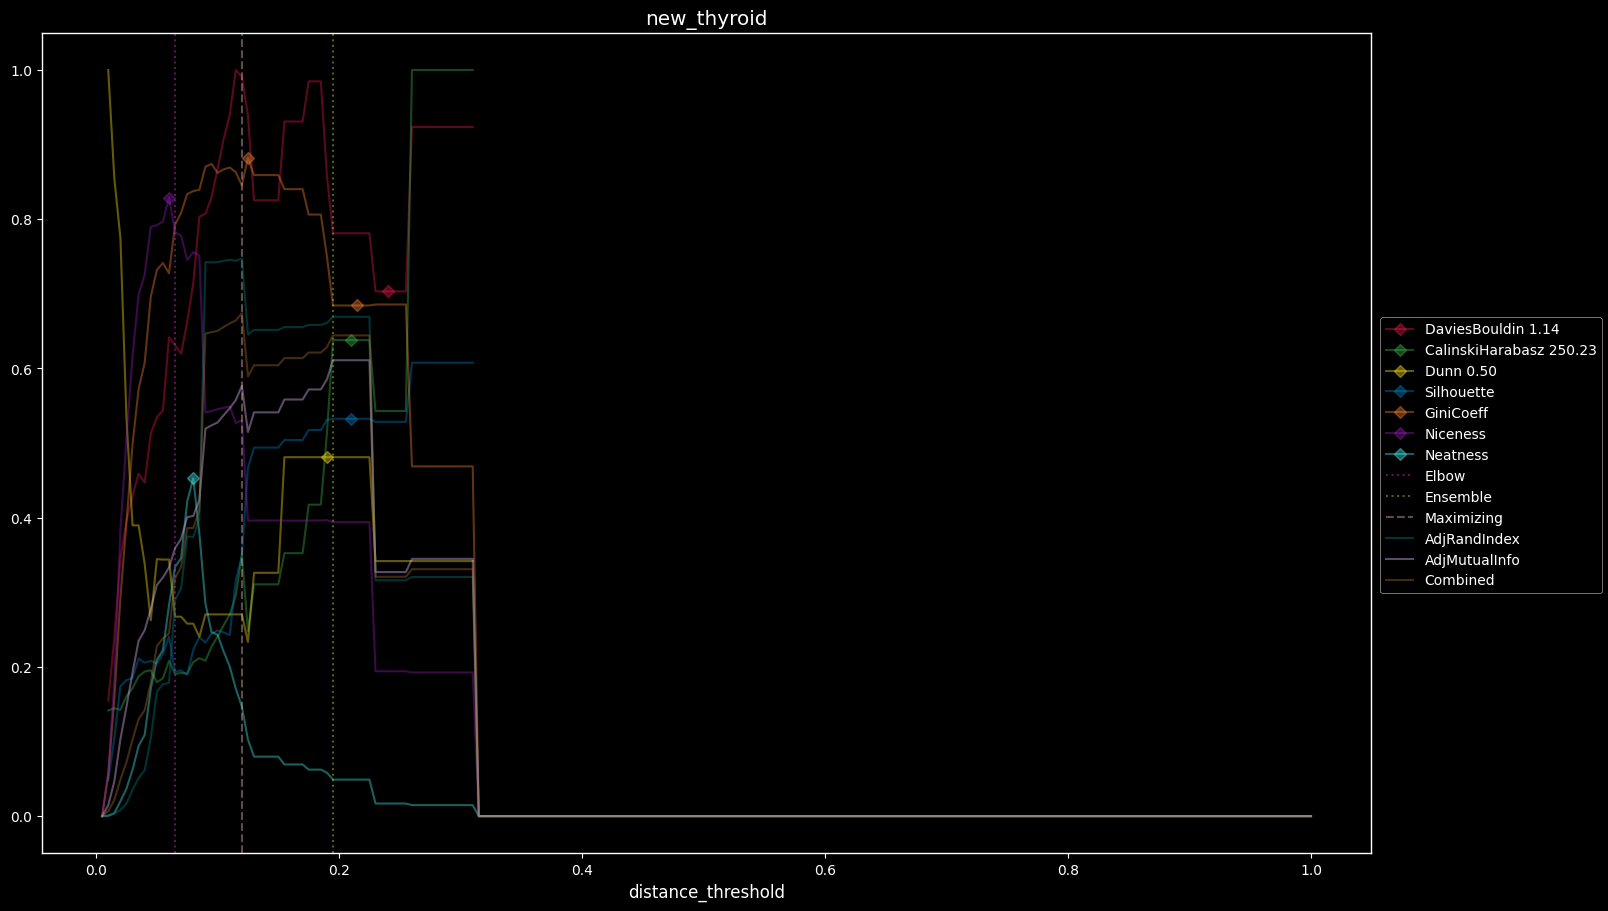

{'Silhouette': 0.3487242085898186, 'Niceness': 0.5305229485396384, 'GiniCoeff': 0.8454545454545455, 'Neatness': 0.14671927637611135, 'sample': {'distance_threshold': 0.12, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 2: 2, 3: 2, 5: 1, 7: 1, 10: 1, 11: 1, 19: 1, 152: 1}, 'DaviesBouldin': 1.1250660532760854, 'CalinskiHarabasz': 87.6958221377228, 'Dunn': 0.1339017936171292, 'AdjRandIndex': 0.7472396095182403, 'AdjMutualInfo': 0.5766370238441718, 'Combined': 0.6741242156579252}
1    150
2     35
3     30
Name: count, dtype: int64
Dataset Summary
n   215.000000
d     5.000000
k     3.000000
e     0.821483
g     0.428571
Name: new_thyroid, dtype: float64


  0%|          | 0/64 [00:00<?, ?it/s]

[] [1.         2.82842712 4.         4.         4.         4.
 4.         3.66801617 1.60823173 3.87298335 4.         4.
 4.         4.         4.         3.41834209 1.73205081 4.
 4.         4.         4.         4.         4.         2.59367911
 1.         3.83041312 4.         4.         4.         4.
 3.87298335 1.         1.         3.87298335 4.         4.
 4.         4.         3.74165739 1.         2.39631957 4.
 4.         4.         4.         4.         4.         1.9441613
 1.79345015 4.         4.         4.         4.         4.
 4.         2.95050939 1.         3.         4.         4.
 4.         4.         4.         4.        ] []


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

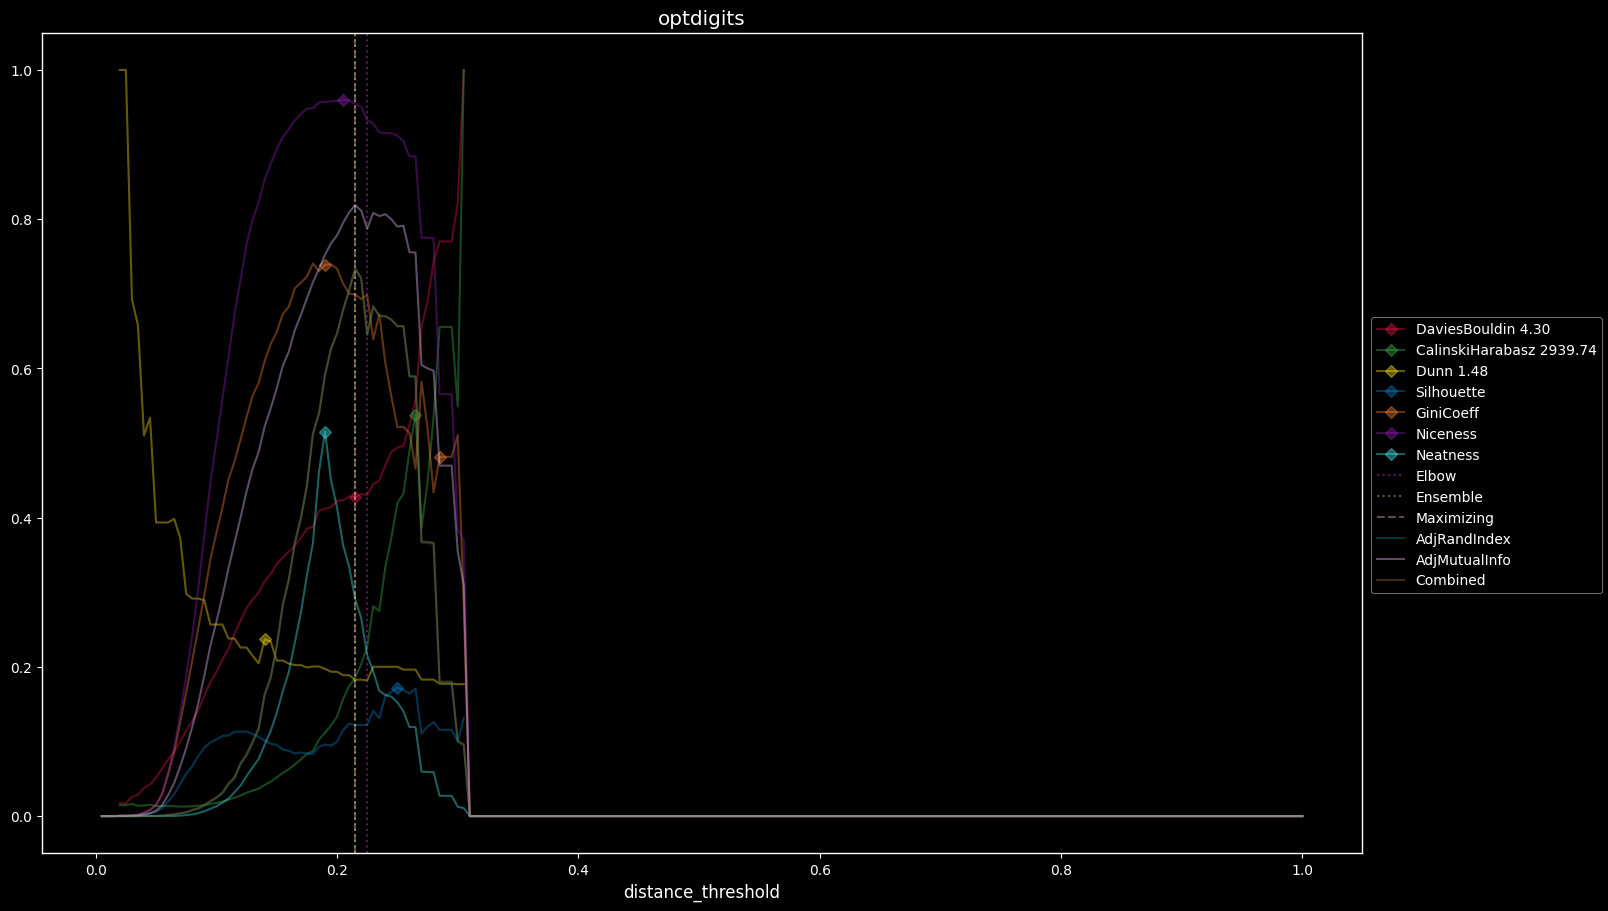

{'Silhouette': 0.12216367279511972, 'Niceness': 0.9543287526922686, 'GiniCoeff': 0.698983787094323, 'Neatness': 0.2907597224038556, 'sample': {'distance_threshold': 0.215, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 6, 2: 5, 3: 3, 4: 2, 7: 2, 10: 1, 11: 5, 15: 1, 24: 1, 27: 1, 55: 1, 56: 1, 65: 1, 73: 1, 109: 1, 123: 1, 124: 1, 137: 1, 154: 1, 164: 1, 185: 1, 187: 1, 194: 1, 196: 1}, 'DaviesBouldin': 1.8396206381068931, 'CalinskiHarabasz': 545.9154596955293, 'Dunn': 0.2704477676562035, 'AdjRandIndex': 0.73359678620109, 'AdjMutualInfo': 0.8188555268743776, 'Combined': 0.7341855294231306}
3    204
1    203
4    202
7    201
9    200
5    199
6    199
2    198
8    197
0    197
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     64.000000
k     10.000000
e      2.302518
g      0.006905
Name: optdigits, dtype: float64


  0%|          | 0/16 [00:00<?, ?it/s]

[] [10.          8.07806106 10.          9.03797354 10.         10.
 10.         10.         10.          9.93092495 10.         10.
  9.93092495 10.         10.         10.        ] []


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

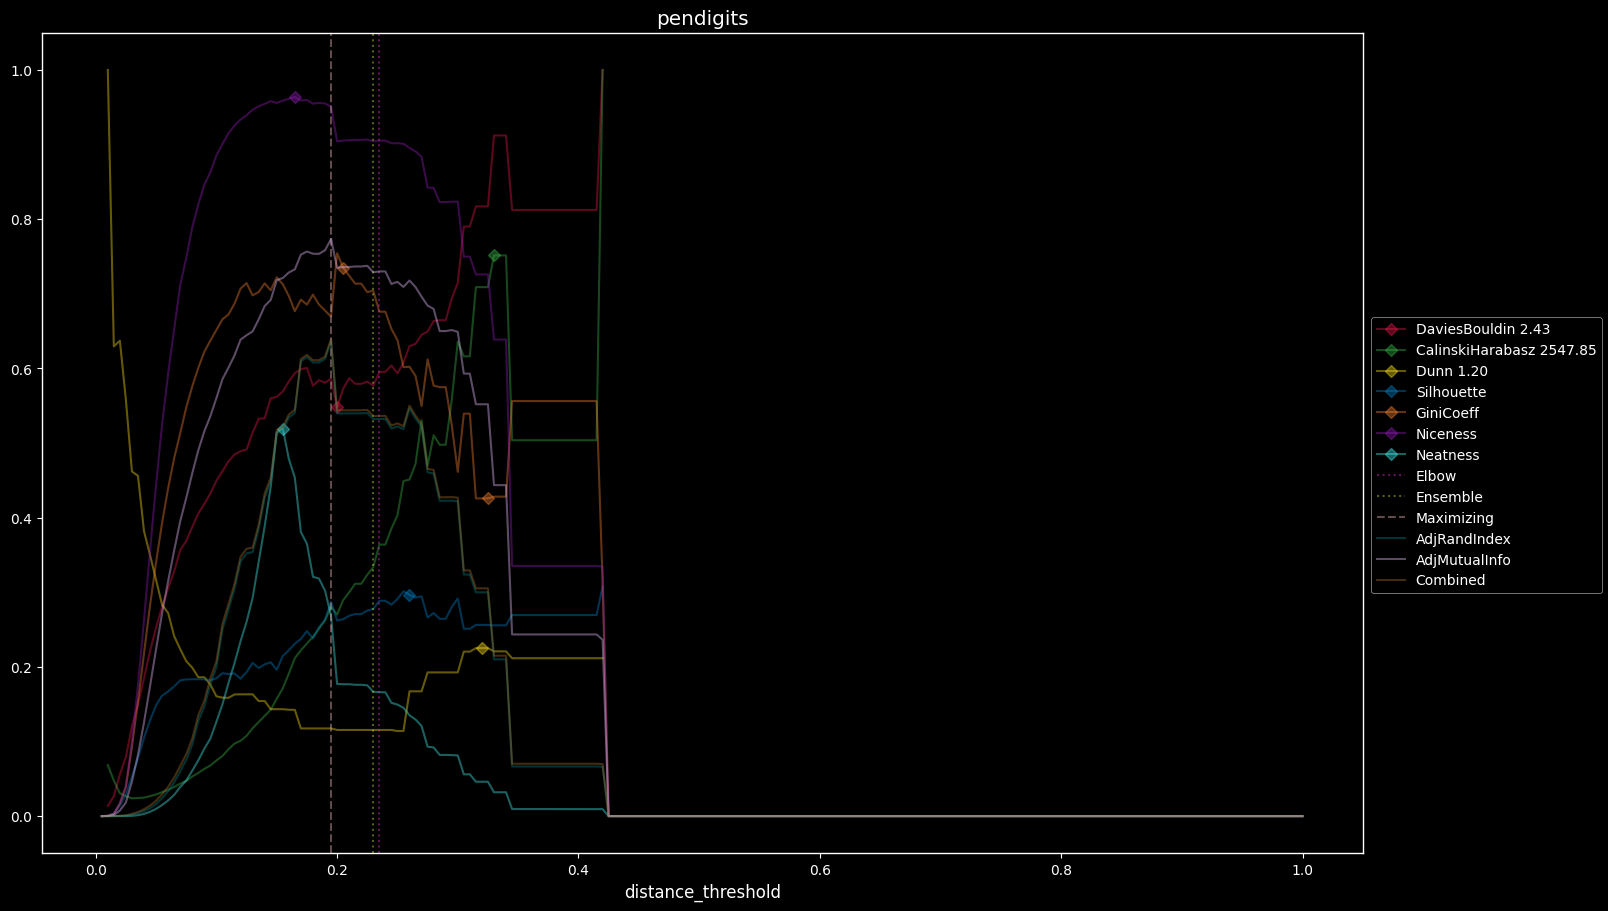

{'Silhouette': 0.28694059558578955, 'Niceness': 0.9507302705441742, 'GiniCoeff': 0.6695519314445145, 'Neatness': 0.26832741890933476, 'sample': {'distance_threshold': 0.195, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 3, 2: 4, 3: 2, 5: 3, 7: 1, 9: 1, 10: 1, 17: 1, 18: 2, 21: 1, 22: 1, 25: 1, 27: 1, 60: 1, 65: 1, 81: 1, 86: 1, 116: 1, 117: 2, 141: 1, 153: 1, 161: 1, 192: 1, 233: 1, 272: 1}, 'DaviesBouldin': 1.42441771956133, 'CalinskiHarabasz': 715.2146649433058, 'Dunn': 0.1407121026524794, 'AdjRandIndex': 0.6365514505826687, 'AdjMutualInfo': 0.7733974768232675, 'Combined': 0.6394150037939345}
1    208
7    208
2    208
4    208
0    208
8    192
5    192
6    192
3    192
9    192
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     16.000000
k     10.000000
e      2.301785
g      0.020925
Name: pendigits, dtype: float64


  0%|          | 0/7 [00:00<?, ?it/s]

[] [ 1.41421356 10.36497061  8.66826575  7.15834764  8.82936644  1.
  1.41421356] []


  0%|          | 0/333 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

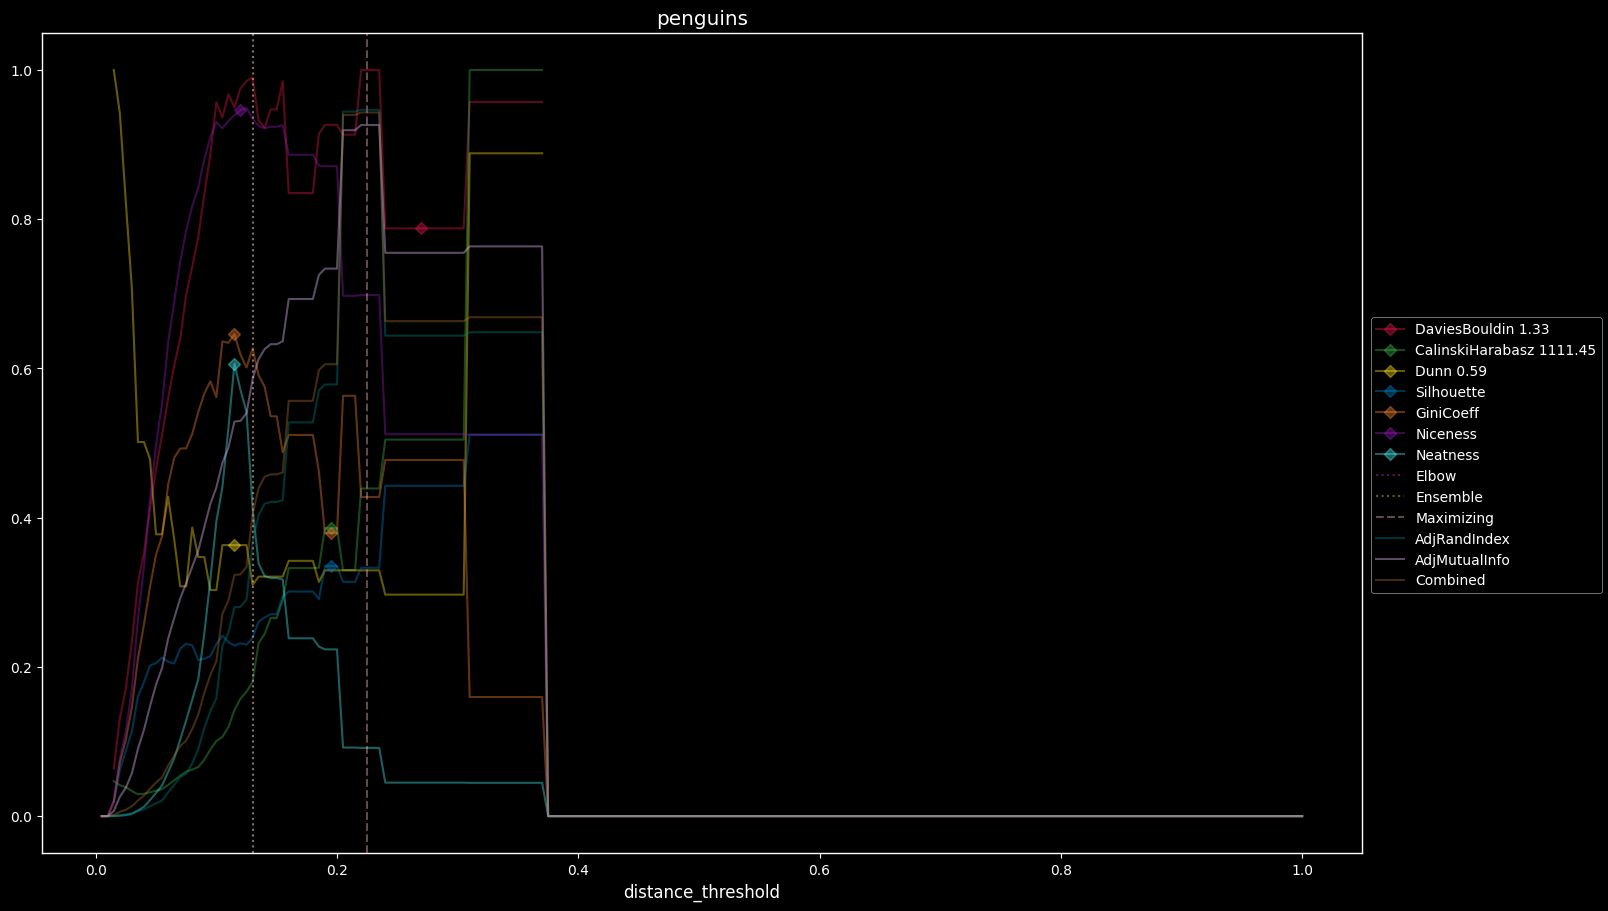

{'Silhouette': 0.3328398142200902, 'Niceness': 0.6982909573948878, 'GiniCoeff': 0.42773109243697477, 'Neatness': 0.09146166363549345, 'sample': {'distance_threshold': 0.225, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 62: 1, 118: 1, 152: 1}, 'DaviesBouldin': 1.3336445240073276, 'CalinskiHarabasz': 488.0436223866292, 'Dunn': 0.19549218895946155, 'AdjRandIndex': 0.9465809308898748, 'AdjMutualInfo': 0.9262724111768521, 'Combined': 0.9430312064358338}
0    146
2    119
1     68
Name: count, dtype: int64
Dataset Summary
n   333.000000
d     7.000000
k     3.000000
e     1.053642
g     0.174790
Name: penguins, dtype: float64


  0%|          | 0/20 [00:00<?, ?it/s]

[] [20.97479812 20.45127928 20.14562759 22.19283243 19.50756378 19.30254915
 17.64247985 19.28500149 19.70122371 18.01803498 23.48666521 19.10196382
 20.0071135  22.15672903 19.60629573 20.69216411 21.20945503 18.35956357
 20.1261393  19.65818044] []


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

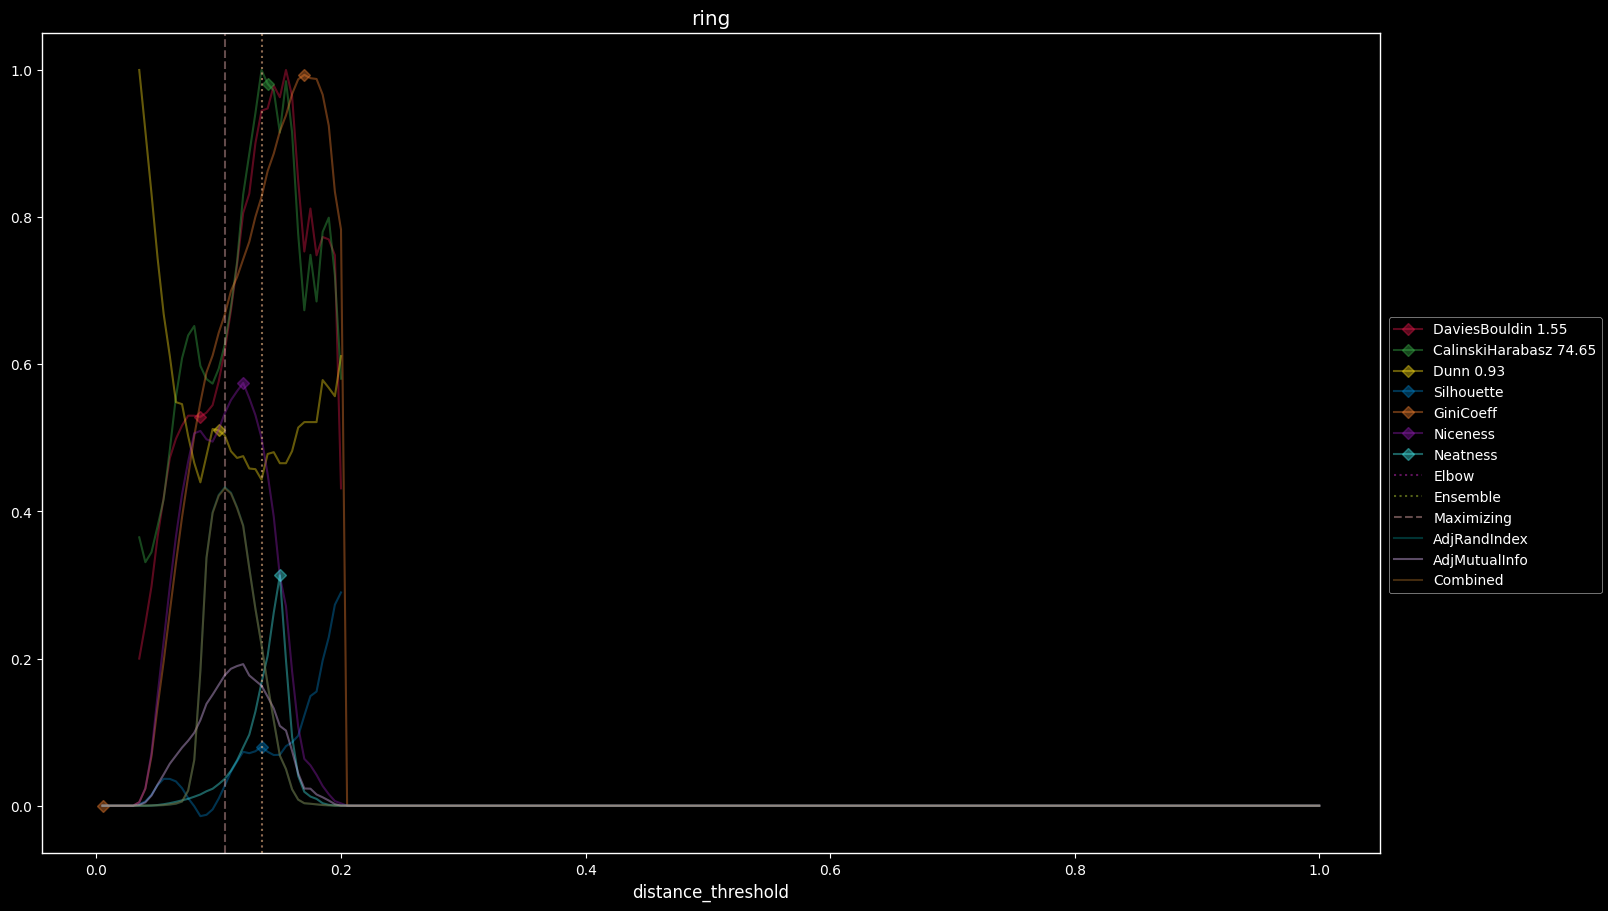

{'Silhouette': 0.027394459728237636, 'Niceness': 0.5336353149515239, 'GiniCoeff': 0.6677431431727372, 'Neatness': 0.03657388608658457, 'sample': {'distance_threshold': 0.105, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 396, 2: 155, 3: 39, 4: 23, 5: 5, 6: 4, 7: 2, 8: 1, 1014: 1}, 'DaviesBouldin': 0.9583445873878306, 'CalinskiHarabasz': 46.821252022936804, 'Dunn': 0.4690720649822736, 'AdjRandIndex': 0.43283125744284084, 'AdjMutualInfo': 0.1774474367759445, 'Combined': 0.4314952574509772}
1    1010
0     990
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     20.000000
k      2.000000
e      0.693097
g      0.005231
Name: ring, dtype: float64


  0%|          | 0/36 [00:00<?, ?it/s]

[] [6.70182285 7.99737455 8.3010945  9.19943417 6.70182285 8.0691147
 8.27987824 9.04221469 6.77268286 8.38866657 8.34291882 9.3515343
 6.70484463 8.30686941 7.93868826 9.1373959  6.63305215 8.22781774
 8.06492293 9.29621108 6.48400851 8.29506267 7.9992445  8.88772843
 6.63305215 8.39832308 8.16522162 9.03359311 6.63305215 8.29319546
 7.90579104 9.14009365 6.63305215 8.11044346 7.67631542 9.22991556] []


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

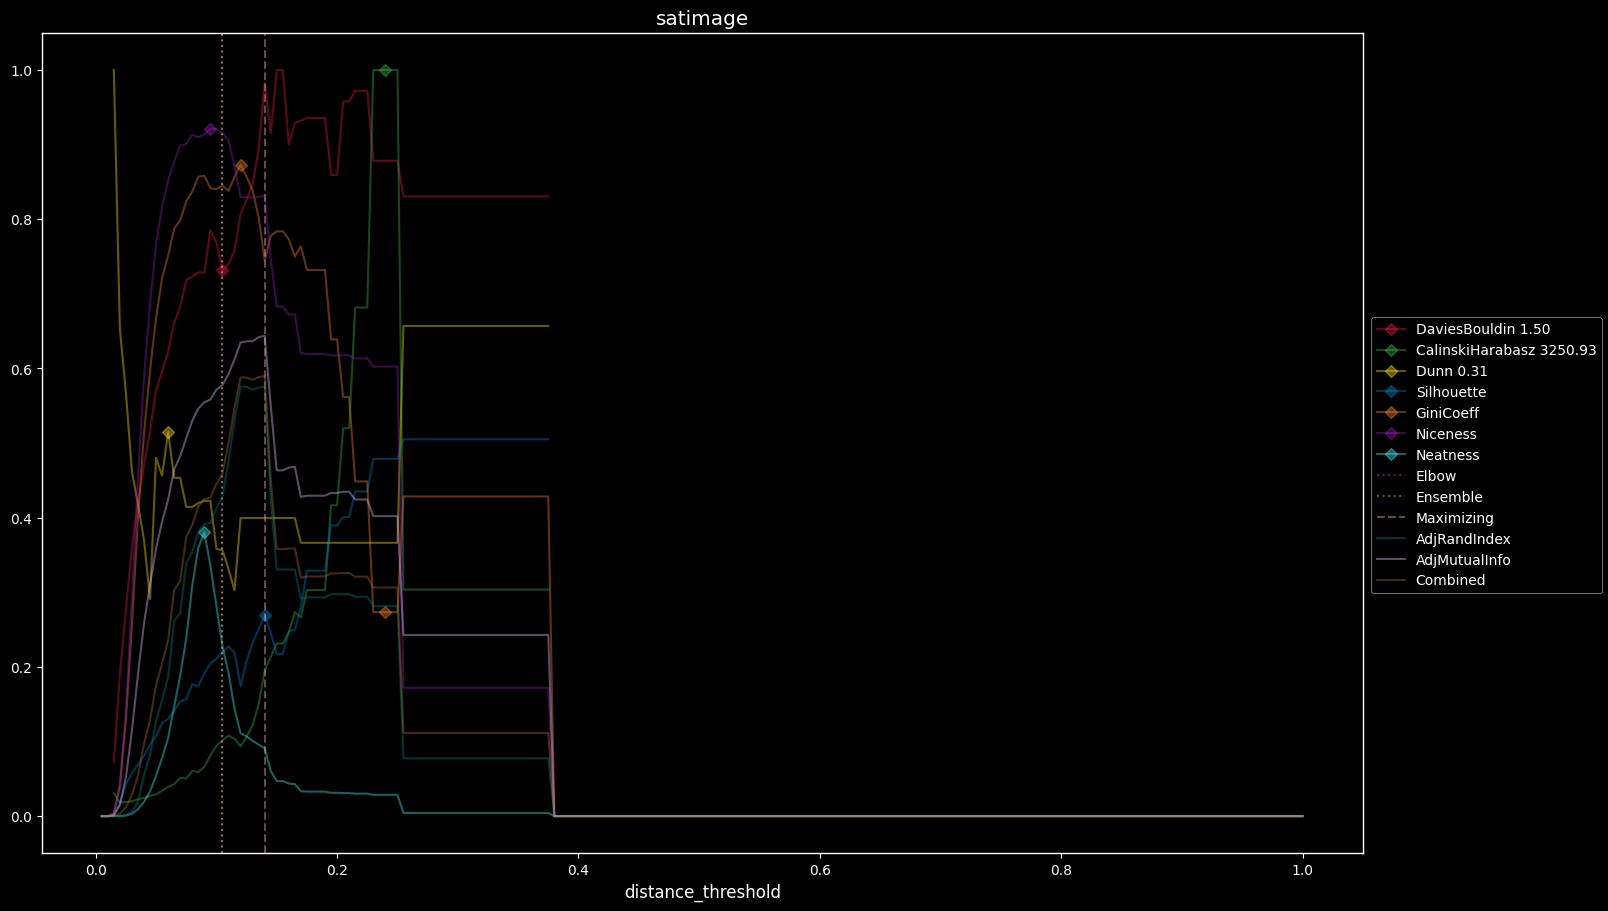

{'Silhouette': 0.2694170457295688, 'Niceness': 0.8314859384082329, 'GiniCoeff': 0.744635310529699, 'Neatness': 0.09102625128535596, 'sample': {'distance_threshold': 0.14, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 2: 1, 3: 1, 5: 1, 8: 1, 10: 1, 11: 1, 12: 3, 27: 1, 122: 1, 149: 1, 211: 1, 303: 1, 537: 1, 575: 1}, 'DaviesBouldin': 1.4789003076808225, 'CalinskiHarabasz': 634.061760255477, 'Dunn': 0.12338115215385664, 'AdjRandIndex': 0.5756949511890136, 'AdjMutualInfo': 0.6438350290969574, 'Combined': 0.5897158693356145}
1    476
7    469
3    422
5    220
2    218
4    195
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     36.000000
k      6.000000
e      1.721394
g      0.205766
Name: satimage, dtype: float64


  0%|          | 0/19 [00:00<?, ?it/s]

[] [15.86245557 15.31399335  1.          1.73205081  1.41421356  8.53412158
  4.1032168   7.28261364  3.87479129 22.21301757 20.49154132 18.56395589
 18.93766634 18.67393779 21.10690462 16.28952892 18.63040265 24.40815384
 10.70986913] []


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

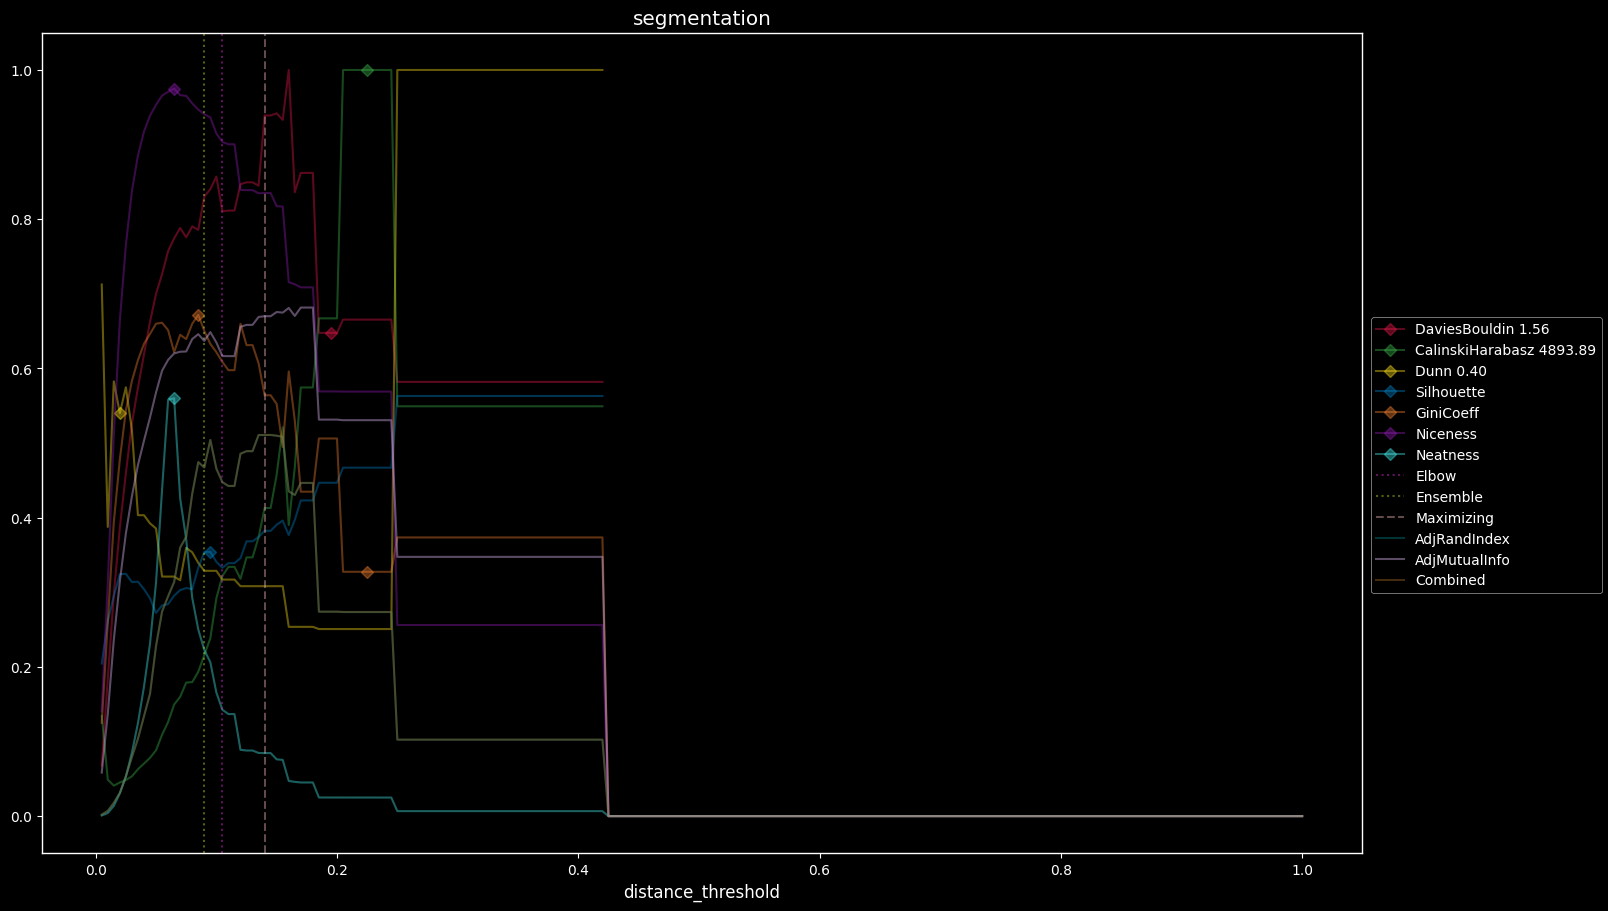

{'Silhouette': 0.38236731448158007, 'Niceness': 0.8351222283538079, 'GiniCoeff': 0.5640432457568008, 'Neatness': 0.08450597759380614, 'sample': {'distance_threshold': 0.14, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {2: 1, 6: 1, 13: 1, 34: 1, 61: 1, 252: 1, 285: 1, 303: 1, 474: 1, 570: 1}, 'DaviesBouldin': 1.4685202733927054, 'CalinskiHarabasz': 2021.1582938982103, 'Dunn': 0.12188791369767714, 'AdjRandIndex': 0.510788531732421, 'AdjMutualInfo': 0.670025972252025, 'Combined': 0.5109075353665158}
5    286
6    286
3    286
2    286
4    286
1    285
0    285
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     19.000000
k      7.000000
e      1.945909
g      0.000747
Name: segmentation, dtype: float64


  0%|          | 0/35 [00:00<?, ?it/s]

[] [2.64575131 1.41421356 1.73205081 1.73205081 1.41421356 2.
 2.         1.73205081 1.73205081 1.73205081 1.41421356 1.
 1.73205081 1.73205081 1.73205081 1.41421356 1.41421356 1.73205081
 1.41421356 1.41421356 2.         2.         1.41421356 1.73205081
 1.41421356 1.73205081 1.41421356 2.         2.         1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.73205081] []


  0%|          | 0/675 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

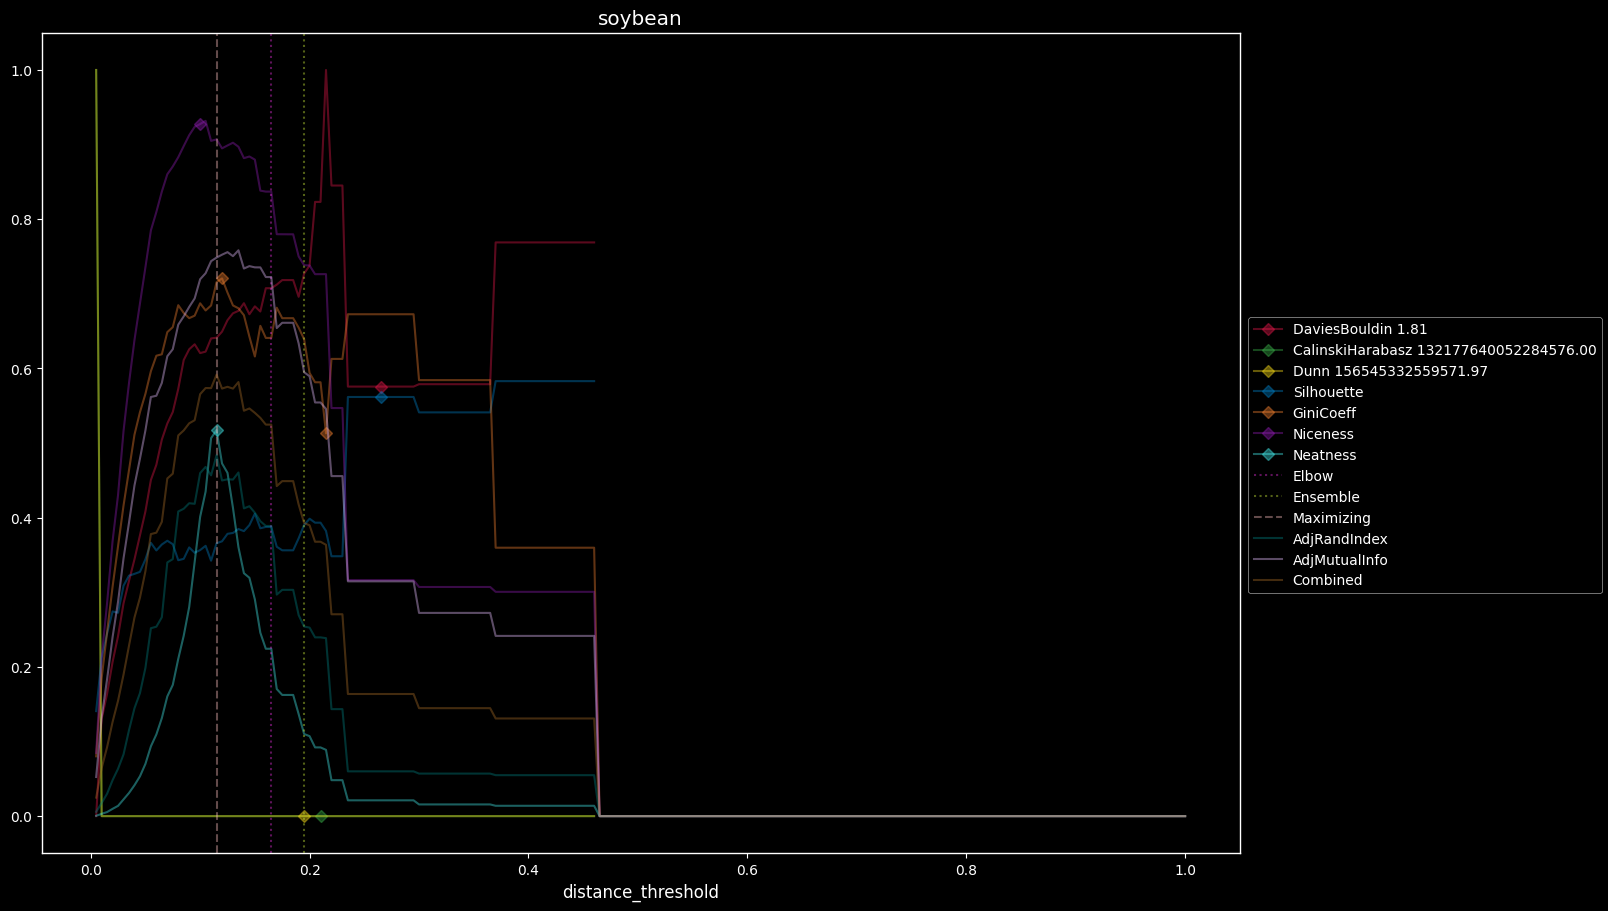

{'Silhouette': 0.3657086058905205, 'Niceness': 0.906976687749207, 'GiniCoeff': 0.7157296940347788, 'Neatness': 0.51736227356022, 'sample': {'distance_threshold': 0.115, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 8, 2: 5, 3: 3, 4: 2, 5: 1, 6: 3, 7: 1, 8: 1, 9: 2, 11: 1, 14: 1, 15: 1, 16: 1, 20: 5, 24: 2, 31: 1, 40: 1, 59: 1, 68: 1, 182: 1}, 'DaviesBouldin': 1.1633229397833613, 'CalinskiHarabasz': 270.4763451823251, 'Dunn': 0.30821291703617026, 'AdjRandIndex': 0.4838132251747757, 'AdjMutualInfo': 0.7486103588516999, 'Combined': 0.5916161685061194}
5     92
12    91
1     91
15    88
6     44
2     44
10    20
17    20
14    20
4     20
7     20
3     20
11    20
16    20
18    20
0     16
9     15
8     14
Name: count, dtype: int64
Dataset Summary
n   675.000000
d    35.000000
k    18.000000
e     2.625593
g     0.407115
Name: soybean, dtype: float64


  0%|          | 0/40 [00:00<?, ?it/s]

[] [15.55043289 20.62917347 22.88349025 21.56798954 22.48590124 20.44320004
 19.71488972 22.65673512 22.90579238 25.93206627 15.55043289 21.59100996
 24.20653729 18.33564192 17.69673702 16.25321685 22.90953368 19.95092374
 19.10248311 25.61165533 15.55043289 21.32703023 22.4697003  22.43522932
 23.2393009  22.29373662 19.39570037 20.76540328 21.60772504 21.71906024
 15.55043289 18.02604502 24.89268303 16.37458323 18.66938087 17.46054116
 17.2399067  20.53290767 19.65674577 22.37049866] []


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

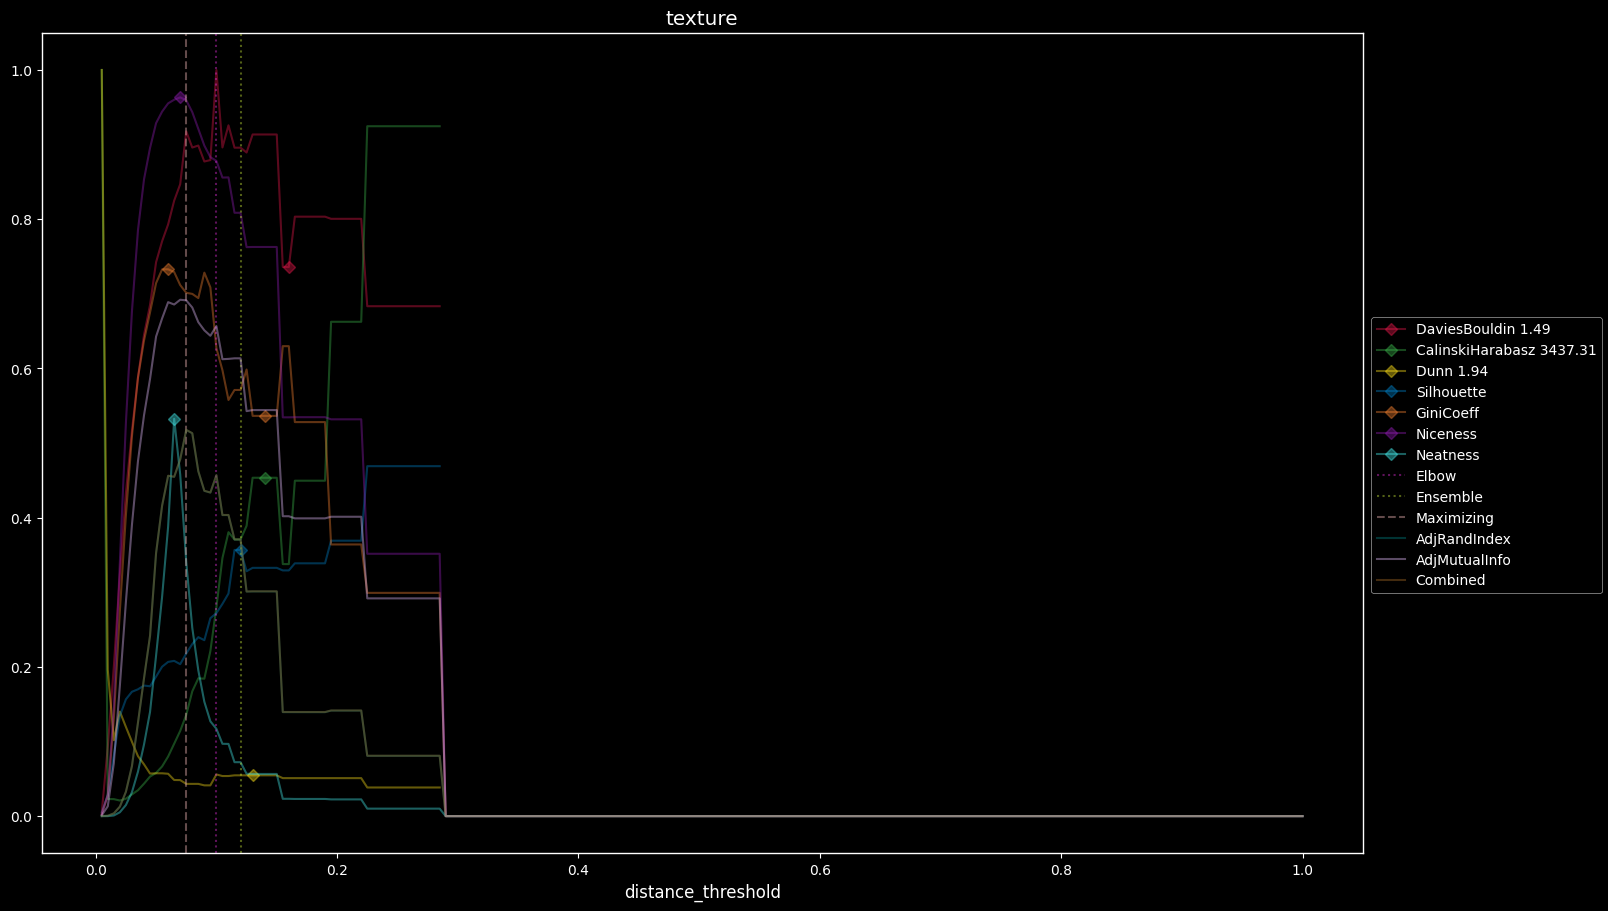

{'Silhouette': 0.21798527641483204, 'Niceness': 0.9594132217694266, 'GiniCoeff': 0.701370320855615, 'Neatness': 0.340645582875048, 'sample': {'distance_threshold': 0.075, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 7, 2: 4, 3: 4, 4: 2, 5: 1, 6: 3, 7: 3, 9: 1, 11: 1, 13: 1, 14: 1, 16: 1, 19: 1, 25: 2, 35: 1, 38: 1, 48: 1, 77: 1, 92: 1, 93: 1, 103: 1, 106: 1, 112: 1, 113: 1, 117: 1, 125: 1, 167: 1, 169: 1, 181: 1, 213: 1}, 'DaviesBouldin': 1.3665737214585476, 'CalinskiHarabasz': 466.09632634342574, 'Dunn': 0.0840116380455279, 'AdjRandIndex': 0.5175222769733951, 'AdjMutualInfo': 0.6912242284647552, 'Combined': 0.5176709723938132}
6     182
13    182
12    182
4     182
9     182
7     182
3     182
10    182
14    182
8     181
2     181
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     40.000000
k     11.000000
e      2.397893
g      0.000856
Name: texture, dtype: float64


  0%|          | 0/44 [00:00<?, ?it/s]

[] [13.94297372  1.01732571  1.01736622 20.51929081  1.00748755  1.00714455
 10.801846    1.0169776   1.01700089 20.79805282  1.00418428  1.00417944
  2.82842712 11.98017325 18.29865247 15.41898309  7.13432872  1.
  9.30834899 10.28237507 15.74857872  1.         15.54166696 19.28890624
  1.73205076 15.78946279 16.94795268 16.67641738 14.77387159 15.3127281
 18.19664769  1.41421354  4.68912782 13.44577631  4.98217817  5.22624157
  9.54615665  5.33341301  1.68188022  1.         12.74549821  2.44067257
 18.83529176  3.89212857] []


  0%|          | 0/959 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

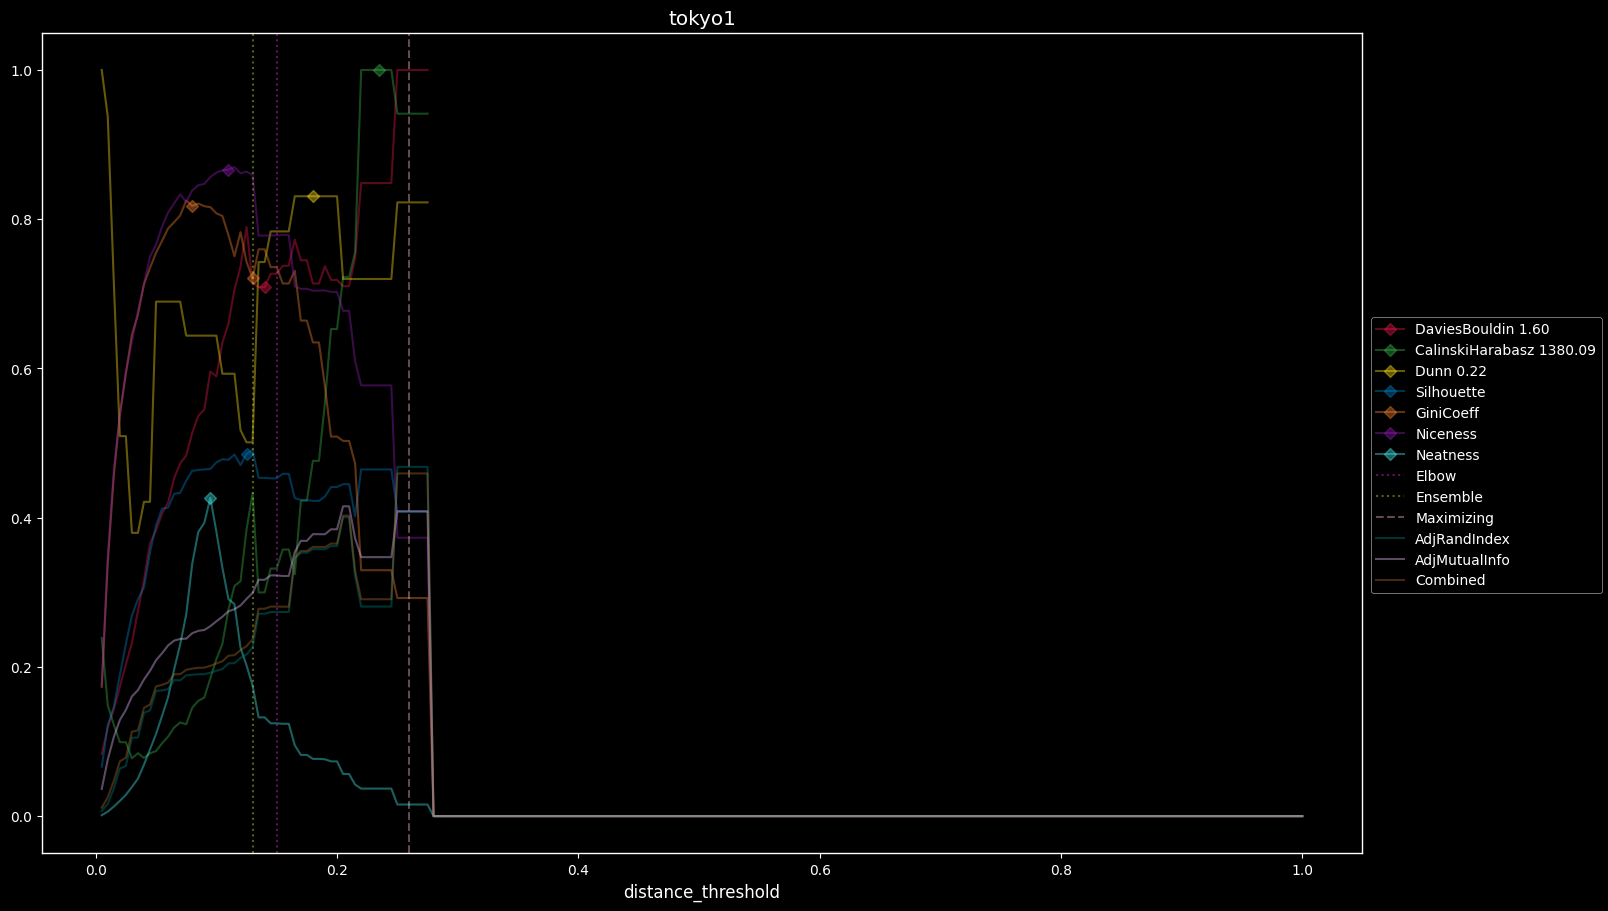

{'Silhouette': 0.4078333297685654, 'Niceness': 0.37313134542006177, 'GiniCoeff': 0.29229525862068967, 'Neatness': 0.015573873713266465, 'sample': {'distance_threshold': 0.26, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {217: 1, 742: 1}, 'DaviesBouldin': 1.598376451051455, 'CalinskiHarabasz': 1299.2609864788458, 'Dunn': 0.17959271793193785, 'AdjRandIndex': 0.46813161453635177, 'AdjMutualInfo': 0.4086319445671108, 'Combined': 0.4592868090705578}
1    613
0    346
Name: count, dtype: int64
Dataset Summary
n   959.000000
d    44.000000
k     2.000000
e     0.653873
g     0.148653
Name: tokyo1, dtype: float64


  0%|          | 0/20 [00:00<?, ?it/s]

[] [26.6460208  21.74838672 25.93984554 23.75780305 23.20096875 23.19686603
 20.12987613 22.40269396 24.56007231 22.5356529  23.6642775  23.4915907
 24.32042894 24.26452126 25.0970237  23.93505231 28.05949602 25.84735344
 23.47198699 22.62404321] []


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

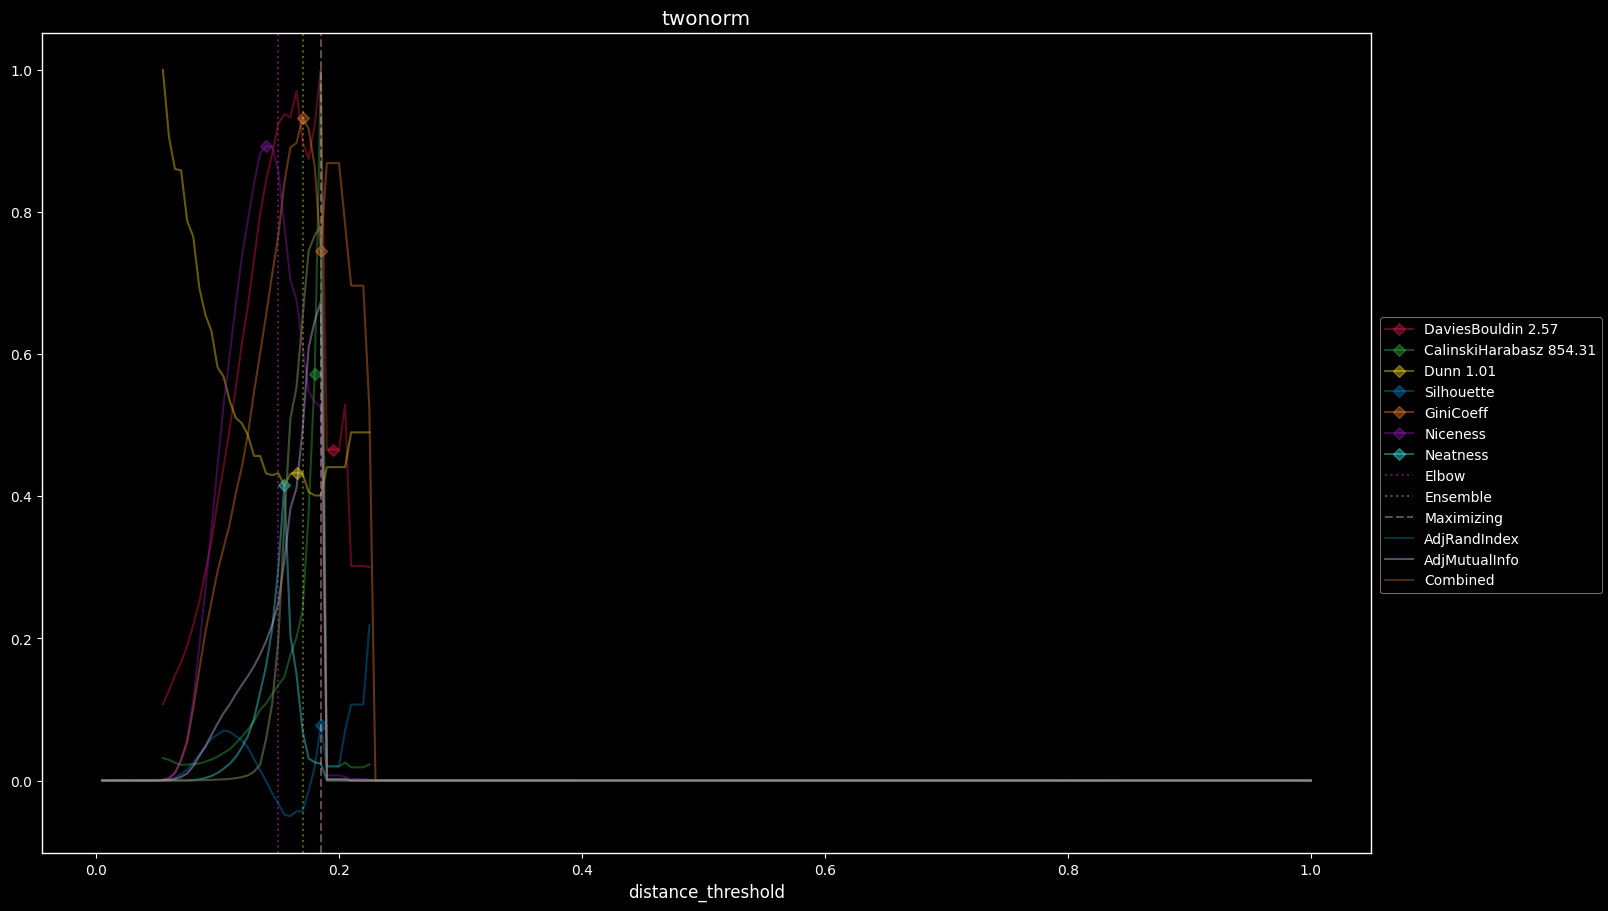

{'Silhouette': 0.0775023137169547, 'Niceness': 0.5248969767402777, 'GiniCoeff': 0.7456903710100641, 'Neatness': 0.02370829861184792, 'sample': {'distance_threshold': 0.185, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 4, 3: 1, 987: 1, 1006: 1}, 'DaviesBouldin': 2.5666555779103493, 'CalinskiHarabasz': 854.3146879093432, 'Dunn': 0.40603495003051276, 'AdjRandIndex': 0.7804794296940456, 'AdjMutualInfo': 0.673834694478911, 'Combined': 0.7804236401906198}
0    1001
1     999
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     20.000000
k      2.000000
e      0.693147
g      0.000523
Name: twonorm, dtype: float64


  0%|          | 0/13 [00:00<?, ?it/s]

[] [8.58311803 9.02564982 6.01968681 6.68996668 5.83738996 8.05022939
 7.42381424 5.9245197  7.40434519 8.59336578 6.77309152 9.56481301
 8.65561914] []


  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

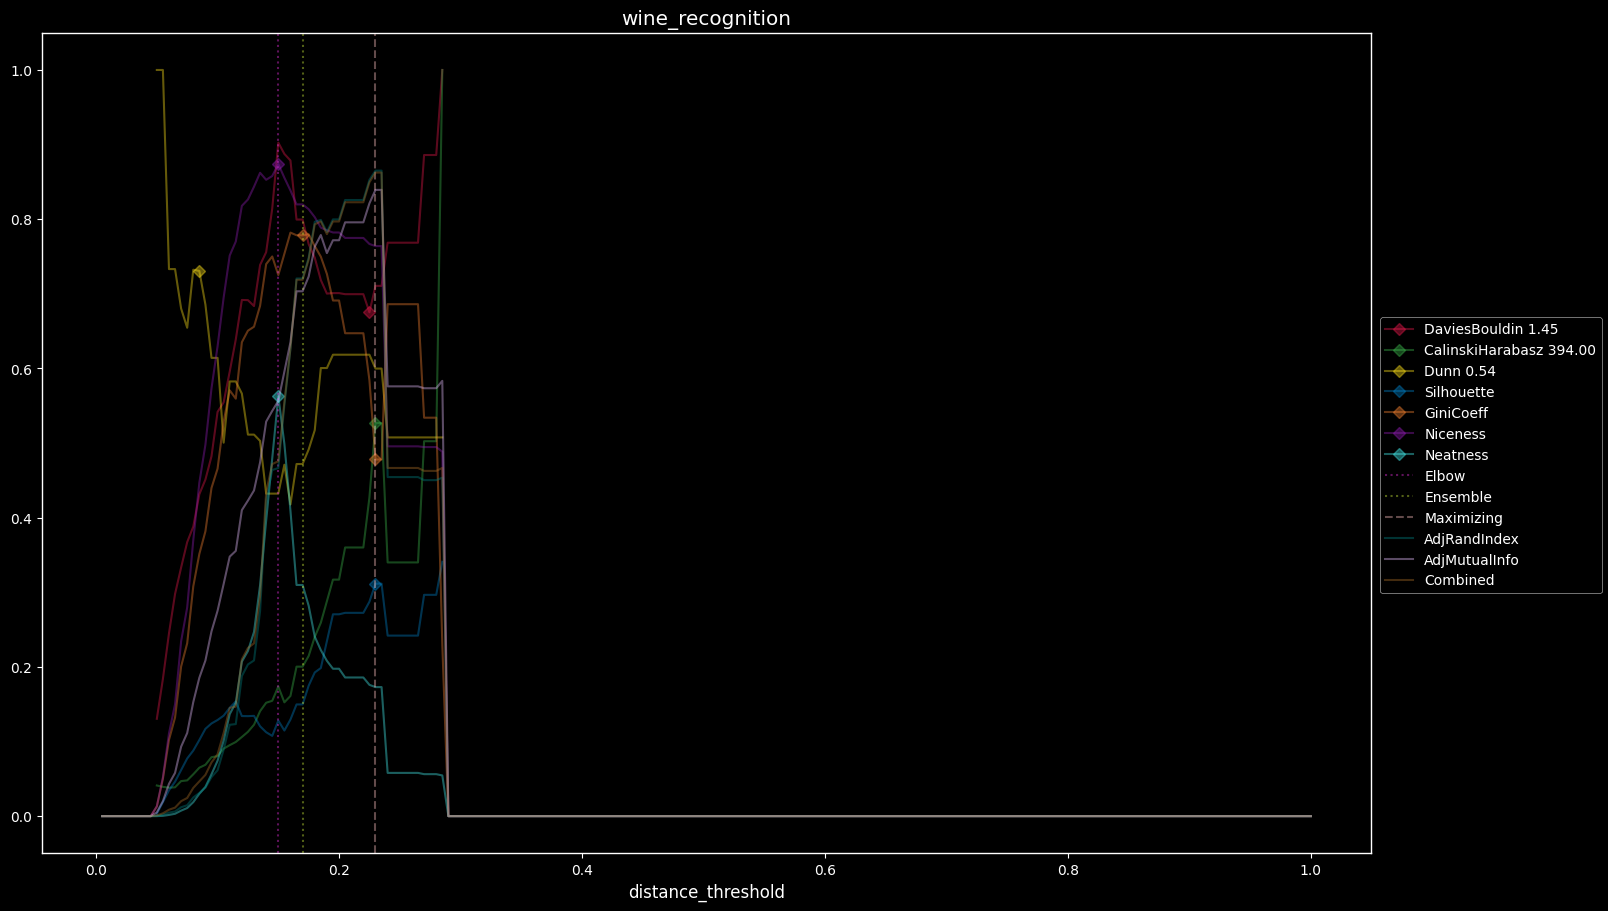

{'Silhouette': 0.3115524014498681, 'Niceness': 0.7639555174228954, 'GiniCoeff': 0.477979797979798, 'Neatness': 0.17295862607338017, 'sample': {'distance_threshold': 0.23, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 2, 53: 1, 61: 1, 62: 1}, 'DaviesBouldin': 1.0332821878296703, 'CalinskiHarabasz': 207.5470918496055, 'Dunn': 0.3235339555455477, 'AdjRandIndex': 0.8651168482162414, 'AdjMutualInfo': 0.8393073258750644, 'Combined': 0.862518515832399}
2    71
1    59
3    48
Name: count, dtype: int64
Dataset Summary
n   178.000000
d    13.000000
k     3.000000
e     1.086038
g     0.100673
Name: wine_recognition, dtype: float64


In [2]:
# https://github.com/EpistasisLab/pmlb/issues/167
# deprecated = [
#     "cmc",
#     "195_auto_price",
#     "207_autoPrice",
#     "glass",
#     "heart_c",
#     "cleve",
#     "cleveland_nominal",
#     "heart_statlog",
#     "heart_h",
#     "colic",
#     "vote",
#     "wdbc",
#     "australian",
#     "buggyCrx",
#     "crx",
#     "breast_w",
#     "pima",
#     "german",
#     "flare",
#     "car_evaluation",
#     "kr_vs_kp",
#     "294_satellite_image",
#     "197_cpu_act",
#     "227_cpu_small",
#     "562_cpu_small",
#     "1595_poker",
# ]

classification_dataset_names = [
    "agaricus_lepiota",
    "analcatdata_authorship",
    "breast",
    "breast_cancer_wisconsin",
    "collins",
    "confidence",
    "dermatology",
    "ecoli",
    "house_votes_84",
    "iris",
    "kddcup",
    "mfeat_factors",
    "mfeat_fourier",
    "mfeat_karhunen",
    "mfeat_morphological",
    "mfeat_pixel",
    "new_thyroid",
    "optdigits",
    "pendigits",
    "penguins",
    "ring",
    "satimage",
    "segmentation",
    "soybean",
    "texture",
    "tokyo1",
    'twonorm',
    "wine_recognition",
]

max_size = 2000

max_muti = 0
max_rand = 0
max_combo = 0
results = 0
ranks = 0
d = {}
r = {}

for classification_dataset in classification_dataset_names:
    X, y = fetch_data(
        classification_dataset, return_X_y=True, local_cache_dir="/Users/temp/pmlb_data"
    )
    if len(X) > max_size:
        _, X, _, y = train_test_split(X, y, test_size=max_size, random_state=42, stratify=y)
    X = pd.DataFrame(X)
    y = pd.Series(y)
    if X.shape[1] > 2:
        vis = pd.DataFrame(
            umap.UMAP(random_state=42).fit_transform(X), columns=list("ab"), index=X.index
        )
    elif X.shape[1] == 2:
        vis = X.copy()
        vis.columns = list("ab")
    else:
        vis = X.copy()
        vis.columns = ["a"]
        vis["b"] = 0.0
    kwargs = dict(
        df=X,
        title=f"{classification_dataset}",
        actual=y,
    )
    if "precomputed" in inspect.getfullargspec(optimize).args:
        kwargs["precomputed"] = True
        kwargs["chunksize"] = 20
    clusters, (score, res) = optimize(**kwargs)
    # print(res)
    # plt.title(f"{classification_dataset} - Actual")
    # scatterplot(vis, x="a", y="b", hue=y, alpha=0.5, palette="bright", legend=False)
    # plt.show()
    # plt.title(f"{classification_dataset} - Best Possible Prediction")
    # scatterplot(vis, x="a", y="b", hue=clusters, alpha=0.5, palette="bright", legend=False)
    # plt.show()
    rank = res.rank(ascending=False)
    max_muti += res.max_muti
    max_rand += res.max_rand
    max_combo += res.max_combo
    results += res
    ranks += rank
    res = res.Combined
    res["n"], res["d"] = X.shape
    res["k"] = len(np.unique(y))
    _, counts = np.unique(y, return_counts=True)
    res["e"] = entropy(counts)
    res["g"] = gini_coefficient(counts)
    res.name = classification_dataset
    d[classification_dataset] = res
    res.index.name = "Dataset Summary"
    print(res[["n", "d", "k", "e", "g"]])
    res.index.name = "Metric"
    rank = rank.Combined
    rank["n"], rank["d"], rank["k"], rank["e"], rank["g"] = res[["n", "d", "k", "e", "g"]]
    r[classification_dataset] = rank

denom = len(classification_dataset_names)

max_muti /= denom
max_rand /= denom
max_combo /= denom
results /= denom
ranks /= denom
df = pd.DataFrame(d).T
df_rank = pd.DataFrame(r).T

# Results

In [3]:
print("Average Mutual Information:", max_muti)
print("Average Rand Index:", max_rand)
print("Average Combined:", max_combo)

Average Mutual Information: 0.6796705121938037
Average Rand Index: 0.6488345455229328
Average Combined: 0.6486852614314988


### Results across all datasets
- Averages per metric broken down by Mutual Information, Rand Index, and Combined
- Summary statistics
- Correlation matrix
- Mann-Whitney U test

### Raw Scores

In [4]:
results

AdjMutualInfo  AdjRandIndex  Combined
Metric                                                 
BIC                    0.000000      0.000000  0.000000
DaviesBouldin          0.500081      0.418108  0.419547
CalinskiHarabasz       0.510472      0.446434  0.452217
Dunn                   0.484989      0.393456  0.399849
Silhouette             0.593874      0.509778  0.512508
GiniCoeff_peak         0.539774      0.450976  0.455036
GiniCoeff_trough       0.576650      0.493786  0.498941
Niceness               0.541840      0.409187  0.424280
Neatness               0.542797      0.426924  0.435219
Elbow                  0.562492      0.463966  0.472690
Ensemble               0.602237      0.528688  0.533812

In [5]:
df.describe()

Metric       BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
count  28.000000      28.000000         28.000000 28.000000   28.000000   
mean    0.000000       0.419547          0.452217  0.399849    0.512508   
std     0.000000       0.254854          0.277034  0.247652    0.244363   
min     0.000000       0.000002          0.000063  0.000199    0.049997   
25%     0.000000       0.219333          0.259011  0.221583    0.326384   
50%     0.000000       0.459667          0.479192  0.364802    0.585928   
75%     0.000000       0.610296          0.658857  0.600512    0.697979   
max     0.000000       0.937141          0.909557  0.963614    0.909557   

Metric  GiniCoeff_peak  GiniCoeff_trough  Niceness  Neatness     Elbow  \
count        28.000000         28.000000 28.000000 28.000000 28.000000   
mean          0.455036          0.498941  0.424280  0.435219  0.472690   
std           0.207823          0.232912  0.186503  0.156693  0.151268   
min           0.003386          0.000000  0.058755  0.068190  0.197072   
25%           0.329379          0.306087  0.321436  0.358409  0.346949   
50%           0.502422          0.560988  0.440122  0.451152  0.469040   
75%           0.588334          0.646252  0.547161  0.513319  0.604579   
max           0.781553          0.909557  0.817644  0.734438  0.694967   

Metric  Ensemble           n          d         k         e         g  
count  28.000000   28.000000  28.000000 28.000000 28.000000 28.000000  
mean    0.533812 1225.142857  42.178571  6.535714  1.543482  0.143445  
std     0.176041  810.794430  56.517486  4.307462  0.716043  0.193266  
min     0.218372   72.000000   3.000000  2.000000  0.644154  0.000000  
25%     0.401829  417.750000  12.250000  2.750000  0.789399  0.000392  
50%     0.536302 1479.500000  22.500000  6.000000  1.545430  0.060799  
75%     0.658020 2000.000000  41.750000 10.000000  2.302585  0.222515  
max     0.937141 2000.000000 240.000000 18.000000  2.625593  0.817516

In [6]:
df.corr()

Metric            BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
Metric                                                                         
BIC               NaN            NaN               NaN       NaN         NaN   
DaviesBouldin     NaN       1.000000          0.642058  0.126238    0.632037   
CalinskiHarabasz  NaN       0.642058          1.000000  0.448587    0.622843   
Dunn              NaN       0.126238          0.448587  1.000000    0.179430   
Silhouette        NaN       0.632037          0.622843  0.179430    1.000000   
GiniCoeff_peak    NaN       0.573240          0.750628  0.165740    0.638500   
GiniCoeff_trough  NaN       0.397448          0.694956  0.587577    0.599560   
Niceness          NaN       0.282131         -0.037650  0.162849    0.108360   
Neatness          NaN       0.217464          0.164828  0.280856    0.257244   
Elbow             NaN       0.428095          0.072251  0.211754    0.248744   
Ensemble          NaN       0.550045          0.518369  0.449231    0.718433   
n                 NaN      -0.490825         -0.570925 -0.231087   -0.169491   
d                 NaN      -0.080081         -0.475126 -0.185869    0.164084   
k                 NaN      -0.247365         -0.454398 -0.187544   -0.281463   
e                 NaN      -0.218268         -0.596309 -0.326486   -0.297313   
g                 NaN       0.325922          0.504729  0.494985    0.355376   

Metric            GiniCoeff_peak  GiniCoeff_trough  Niceness  Neatness  \
Metric                                                                   
BIC                          NaN               NaN       NaN       NaN   
DaviesBouldin           0.573240          0.397448  0.282131  0.217464   
CalinskiHarabasz        0.750628          0.694956 -0.037650  0.164828   
Dunn                    0.165740          0.587577  0.162849  0.280856   
Silhouette              0.638500          0.599560  0.108360  0.257244   
GiniCoeff_peak          1.000000          0.485194  0.222835  0.469134   
GiniCoeff_trough        0.485194          1.000000  0.016782  0.359372   
Niceness                0.222835          0.016782  1.000000  0.796493   
Neatness                0.469134          0.359372  0.796493  1.000000   
Elbow                   0.368944          0.249631  0.804360  0.830524   
Ensemble                0.576530          0.695017  0.439426  0.647321   
n                      -0.365001         -0.456171  0.080796 -0.057238   
d                      -0.267273         -0.056549  0.232205  0.161798   
k                      -0.033208         -0.299788  0.579212  0.537740   
e                      -0.154222         -0.397756  0.509717  0.448848   
g                       0.494052          0.429979  0.273625  0.340882   

Metric               Elbow  Ensemble         n         d         k         e  \
Metric                                                                         
BIC                    NaN       NaN       NaN       NaN       NaN       NaN   
DaviesBouldin     0.428095  0.550045 -0.490825 -0.080081 -0.247365 -0.218268   
CalinskiHarabasz  0.072251  0.518369 -0.570925 -0.475126 -0.454398 -0.596309   
Dunn              0.211754  0.449231 -0.231087 -0.185869 -0.187544 -0.326486   
Silhouette        0.248744  0.718433 -0.169491  0.164084 -0.281463 -0.297313   
GiniCoeff_peak    0.368944  0.576530 -0.365001 -0.267273 -0.033208 -0.154222   
GiniCoeff_trough  0.249631  0.695017 -0.456171 -0.056549 -0.299788 -0.397756   
Niceness          0.804360  0.439426  0.080796  0.232205  0.579212  0.509717   
Neatness          0.830524  0.647321 -0.057238  0.161798  0.537740  0.448848   
Elbow             1.000000  0.611669 -0.061944  0.355855  0.405032  0.406265   
Ensemble          0.611669  1.000000 -0.129534  0.244349  0.023038  0.004966   
n                -0.061944 -0.129534  1.000000  0.405125  0.337582  0.354914   
d                 0.355855  0.244349  0.405125  1.000000  0.337486  0.395907   
k                 0.405032

In [7]:
columns = df.columns[:-5]
pd.DataFrame([[mannwhitneyu(df[x], df[y]).pvalue for x in columns]
              for y in columns], index=columns, columns=columns)

Metric                BIC  DaviesBouldin  CalinskiHarabasz     Dunn  \
Metric                                                                
BIC              1.000000       0.000000          0.000000 0.000000   
DaviesBouldin    0.000000       1.000000          0.571832 0.793172   
CalinskiHarabasz 0.000000       0.571832          1.000000 0.491282   
Dunn             0.000000       0.793172          0.491282 1.000000   
Silhouette       0.000000       0.146979          0.389546 0.088332   
GiniCoeff_peak   0.000000       0.481016          0.902184 0.286802   
GiniCoeff_trough 0.000000       0.254751          0.588554 0.129561   
Niceness         0.000000       0.980390          0.640476 0.517451   
Neatness         0.000000       0.941217          0.812181 0.333624   
Elbow            0.000000       0.426736          0.902184 0.158749   
Ensemble         0.000000       0.079509          0.254727 0.017109   

Metric            Silhouette  GiniCoeff_peak  GiniCoeff_trough  Niceness  \
Metric                                                                     
BIC                 0.000000        0.000000          0.000000  0.000000   
DaviesBouldin       0.146979        0.481016          0.254751  0.980390   
CalinskiHarabasz    0.389546        0.902184          0.588554  0.640476   
Dunn                0.088332        0.286802          0.129561  0.517451   
Silhouette          1.000000        0.209990          0.761739  0.115681   
GiniCoeff_peak      0.209990        1.000000          0.486153  0.354521   
GiniCoeff_trough    0.761739        0.486153          1.000000  0.261651   
Niceness            0.115681        0.354521          0.261651  1.000000   
Neatness            0.166148        0.329535          0.376208  0.921668   
Elbow               0.333624        0.915171          0.652250  0.321472   
Ensemble            0.876281        0.313505          0.465840  0.039730   

Metric            Neatness    Elbow  Ensemble  
Metric                                         
BIC               0.000000 0.000000  0.000000  
DaviesBouldin     0.941217 0.426736  0.079509  
CalinskiHarabasz  0.812181 0.902184  0.254727  
Dunn              0.333624 0.158749  0.017109  
Silhouette        0.166148 0.333624  0.876281  
GiniCoeff_peak    0.329535 0.915171  0.313505  
GiniCoeff_trough  0.376208 0.652250  0.465840  
Niceness          0.921668 0.321472  0.039730  
Neatness          1.000000 0.317497  0.033145  
Elbow             0.317497 1.000000  0.206956  
Ensemble          0.033145 0.206956  1.000000

### Ranks

In [8]:
ranks

AdjMutualInfo  AdjRandIndex  Combined
Metric                                                 
BIC                   11.000000     10.982143 11.000000
DaviesBouldin          5.696429      5.946429  5.910714
CalinskiHarabasz       5.535714      5.500000  5.464286
Dunn                   6.571429      6.535714  6.571429
Silhouette             4.446429      4.303571  4.267857
GiniCoeff_peak         5.642857      5.607143  5.678571
GiniCoeff_trough       5.321429      5.196429  5.142857
Niceness               5.821429      5.714286  5.750000
Neatness               6.267857      6.339286  6.339286
Elbow                  5.250000      5.321429  5.321429
Ensemble               4.446429      4.553571  4.553571

In [9]:
df_rank.describe()

Metric       BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
count  28.000000      28.000000         28.000000 28.000000   28.000000   
mean   11.000000       5.910714          5.464286  6.571429    4.267857   
std     0.000000       3.000165          3.135604  3.282147    3.116510   
min    11.000000       1.000000          1.500000  1.000000    1.000000   
25%    11.000000       4.000000          2.375000  3.375000    1.500000   
50%    11.000000       6.000000          5.750000  8.000000    3.500000   
75%    11.000000       8.625000          8.125000 10.000000    6.625000   
max    11.000000      10.000000         10.000000 10.000000   10.000000   

Metric  GiniCoeff_peak  GiniCoeff_trough  Niceness  Neatness     Elbow  \
count        28.000000         28.000000 28.000000 28.000000 28.000000   
mean          5.678571          5.142857  5.750000  6.339286  5.321429   
std           2.369616          2.940324  3.134338  2.792363  2.298205   
min           2.000000          1.500000  1.000000  1.000000  1.000000   
25%           4.000000          2.000000  2.875000  5.125000  3.375000   
50%           5.250000          5.000000  6.000000  7.000000  5.250000   
75%           7.625000          8.000000  8.625000  8.625000  7.625000   
max          10.000000         10.000000 10.000000 10.000000  9.000000   

Metric  Ensemble           n          d         k         e         g  
count  28.000000   28.000000  28.000000 28.000000 28.000000 28.000000  
mean    4.553571 1225.142857  42.178571  6.535714  1.543482  0.143445  
std     1.422955  810.794430  56.517486  4.307462  0.716043  0.193266  
min     1.500000   72.000000   3.000000  2.000000  0.644154  0.000000  
25%     3.375000  417.750000  12.250000  2.750000  0.789399  0.000392  
50%     4.500000 1479.500000  22.500000  6.000000  1.545430  0.060799  
75%     5.625000 2000.000000  41.750000 10.000000  2.302585  0.222515  
max     6.500000 2000.000000 240.000000 18.000000  2.625593  0.817516

In [10]:
df_rank.corr()

Metric            BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
Metric                                                                         
BIC               NaN            NaN               NaN       NaN         NaN   
DaviesBouldin     NaN       1.000000          0.094137 -0.213720    0.118517   
CalinskiHarabasz  NaN       0.094137          1.000000  0.261170    0.019018   
Dunn              NaN      -0.213720          0.261170  1.000000   -0.299754   
Silhouette        NaN       0.118517          0.019018 -0.299754    1.000000   
GiniCoeff_peak    NaN      -0.196945         -0.102542 -0.437435   -0.011732   
GiniCoeff_trough  NaN      -0.096116          0.630265  0.283861    0.098735   
Niceness          NaN      -0.186593         -0.731090 -0.274519   -0.336030   
Neatness          NaN      -0.453822         -0.619321 -0.235109   -0.546015   
Elbow             NaN      -0.154145         -0.525153 -0.285487   -0.203795   
Ensemble          NaN      -0.005345         -0.503833 -0.105926    0.165767   
n                 NaN       0.267500          0.571518 -0.025056   -0.124670   
d                 NaN       0.025763          0.466301  0.065318   -0.246407   
k                 NaN       0.201589          0.678784  0.184504    0.306196   
e                 NaN       0.058934          0.858801  0.320256    0.222257   
g                 NaN       0.063998         -0.397296 -0.259712   -0.047558   

Metric            GiniCoeff_peak  GiniCoeff_trough  Niceness  Neatness  \
Metric                                                                   
BIC                          NaN               NaN       NaN       NaN   
DaviesBouldin          -0.196945         -0.096116 -0.186593 -0.453822   
CalinskiHarabasz       -0.102542          0.630265 -0.731090 -0.619321   
Dunn                   -0.437435          0.283861 -0.274519 -0.235109   
Silhouette             -0.011732          0.098735 -0.336030 -0.546015   
GiniCoeff_peak          1.000000         -0.276228  0.079787  0.296962   
GiniCoeff_trough       -0.276228          1.000000 -0.650039 -0.396320   
Niceness                0.079787         -0.650039  1.000000  0.670201   
Neatness                0.296962         -0.396320  0.670201  1.000000   
Elbow                   0.074082         -0.703122  0.542443  0.458511   
Ensemble               -0.296769         -0.318362  0.189959  0.204984   
n                      -0.034935          0.312779 -0.417007 -0.212401   
d                       0.343091          0.037618 -0.128949 -0.077491   
k                      -0.212920          0.410444 -0.689247 -0.694643   
e                      -0.188909          0.496915 -0.706146 -0.704584   
g                       0.016090         -0.219618  0.216796  0.214387   

Metric               Elbow  Ensemble         n         d         k         e  \
Metric                                                                         
BIC                    NaN       NaN       NaN       NaN       NaN       NaN   
DaviesBouldin    -0.154145 -0.005345  0.267500  0.025763  0.201589  0.058934   
CalinskiHarabasz -0.525153 -0.503833  0.571518  0.466301  0.678784  0.858801   
Dunn             -0.285487 -0.105926 -0.025056  0.065318  0.184504  0.320256   
Silhouette       -0.203795  0.165767 -0.124670 -0.246407  0.306196  0.222257   
GiniCoeff_peak    0.074082 -0.296769 -0.034935  0.343091 -0.212920 -0.188909   
GiniCoeff_trough -0.703122 -0.318362  0.312779  0.037618  0.410444  0.496915   
Niceness          0.542443  0.189959 -0.417007 -0.128949 -0.689247 -0.706146   
Neatness          0.458511  0.204984 -0.212401 -0.077491 -0.694643 -0.704584   
Elbow             1.000000  0.206892 -0.260376 -0.274482 -0.294897 -0.427531   
Ensemble          0.206892  1.000000 -0.324800 -0.462500 -0.152899 -0.325806   
n                -0.260376 -0.324800  1.000000  0.405125  0.337582  0.354914   
d                -0.274482 -0.462500  0.405125  1.000000  0.337486  0.395907   
k                -0.294897

In [11]:
pd.DataFrame([[mannwhitneyu(df_rank[x], df_rank[y]).pvalue for x in columns]
              for y in columns], index=columns, columns=columns)


Metric                BIC  DaviesBouldin  CalinskiHarabasz     Dunn  \
Metric                                                                
BIC              1.000000       0.000000          0.000000 0.000000   
DaviesBouldin    0.000000       1.000000          0.526957 0.423758   
CalinskiHarabasz 0.000000       0.526957          1.000000 0.179127   
Dunn             0.000000       0.423758          0.179127 1.000000   
Silhouette       0.000000       0.049333          0.103707 0.010627   
GiniCoeff_peak   0.000000       0.805185          0.663213 0.182677   
GiniCoeff_trough 0.000000       0.274477          0.662582 0.077891   
Niceness         0.000000       0.882388          0.805270 0.310233   
Neatness         0.000000       0.645224          0.454121 0.488843   
Elbow            0.000000       0.361332          0.993441 0.075202   
Ensemble         0.000000       0.099784          0.392926 0.012661   

Metric            Silhouette  GiniCoeff_peak  GiniCoeff_trough  Niceness  \
Metric                                                                     
BIC                 0.000000        0.000000          0.000000  0.000000   
DaviesBouldin       0.049333        0.805185          0.274477  0.882388   
CalinskiHarabasz    0.103707        0.663213          0.662582  0.805270   
Dunn                0.010627        0.182677          0.077891  0.310233   
Silhouette          1.000000        0.042428          0.194026  0.074471   
GiniCoeff_peak      0.042428        1.000000          0.374735  0.843714   
GiniCoeff_trough    0.194026        0.374735          1.000000  0.454455   
Niceness            0.074471        0.843714          0.454455  1.000000   
Neatness            0.017432        0.259728          0.180050  0.521318   
Elbow               0.093611        0.548383          0.729520  0.565167   
Ensemble            0.281378        0.092911          0.657146  0.136609   

Metric            Neatness    Elbow  Ensemble  
Metric                                         
BIC               0.000000 0.000000  0.000000  
DaviesBouldin     0.645224 0.361332  0.099784  
CalinskiHarabasz  0.454121 0.993441  0.392926  
Dunn              0.488843 0.075202  0.012661  
Silhouette        0.017432 0.093611  0.281378  
GiniCoeff_peak    0.259728 0.548383  0.092911  
GiniCoeff_trough  0.180050 0.729520  0.657146  
Niceness          0.521318 0.565167  0.136609  
Neatness          1.000000 0.099773  0.001417  
Elbow             0.099773 1.000000  0.245552  
Ensemble          0.001417 0.245552  1.000000